<a href="https://colab.research.google.com/github/rupam1305/loan/blob/main/loan_EDA_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loan application case study


> Indented block



In [303]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Reading Datasets

In [304]:
application = pd.read_csv('/content/application_data.csv')
pd.set_option('display.max_columns', None)
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461.0,-637.0,-3648.0,-2120.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,Laborers,1.0,2.0,2.0,WEDNESDAY,10.0,0.0,0.0,0.0,0.0,0.0,0.0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765.0,-1188.0,-1186.0,-291.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,Core staff,2.0,1.0,1.0,MONDAY,11.0,0.0,0.0,0.0,0.0,0.0,0.0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046.0,-225.0,-4260.0,-2531.0,26.0,1.0,1.0,1.0,1.0,1.0,0.0,Laborers,1.0,2.0,2.0,MOND

In [305]:
previous = pd.read_csv('/content/previous_application.csv')
pd.set_option('display.max_columns', None)
previous.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35.0,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1.0,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1.0,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


## Inspecting Datasets

In [306]:
application.shape

(13574, 122)

In [307]:
previous.shape

(29768, 37)

In [308]:
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13574 entries, 0 to 13573
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(103), int64(3), object(16)
memory usage: 12.6+ MB


In [309]:
previous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29768 entries, 0 to 29767
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_PREV                   29768 non-null  int64  
 1   SK_ID_CURR                   29768 non-null  int64  
 2   NAME_CONTRACT_TYPE           29768 non-null  object 
 3   AMT_ANNUITY                  23565 non-null  float64
 4   AMT_APPLICATION              29768 non-null  float64
 5   AMT_CREDIT                   29768 non-null  float64
 6   AMT_DOWN_PAYMENT             15047 non-null  float64
 7   AMT_GOODS_PRICE              23505 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   29768 non-null  object 
 9   HOUR_APPR_PROCESS_START      29768 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  29768 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       29768 non-null  int64  
 12  RATE_DOWN_PAYMENT            15047 non-null  float64
 13  RATE_INTEREST_PR

In [310]:
application.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,13574.000000,13574.000000,13574.000000,1.357400e+04,1.357400e+04,13574.000000,1.356400e+04,13573.000000,13573.000000,13573.000000,13573.000000,13573.000000,4583.000000,13573.0,13573.000000,13573.000000,13573.000000,13573.000000,13573.000000,13573.000000,13573.000000,13573.000000,13573.000000,13573.000000,13573.000000,13573.000000,13573.000000,13573.000000,13573.000000,5911.000000,13536.000000,10854.000000,6718.000000,5691.000000,6972.000000,4555.000000,4083.000000,6404.000000,6794.000000,6886.000000,4369.000000,5568.000000,4283.000000,6777.000000,4153.000000,6150.000000,6718.000000,5691.000000,6972.000000,4555.000000,4083.000000,6404.000000,6794.000000,6886.000000,4369.000000,5568.000000,4283.000000,6777.000000,4153.000000,6150.000000,6718.000000,5691.000000,6972.000000,4555.000000,4083.000000,6404.000000,6794.000000,6886.000000,4369.000000,5568.000000,4283.000000,6777.000000,4153.000000,6150.000000,7058.000000,13517.000000,13517.000000,13517.000000,13517.000000,13573.000000,13573.0,13573.000000,13573.000000,13573.000000,13573.000000,13573.000000,13573.000000,13573.000000,13573.0,13573.000000,13573.0,13573.000000,13573.000000,13573.000000,13573.000000,13573.000000,13573.000000,13573.000000,13573.000000,13573.000000,11730.000000,11730.000000,11730.000000,11730.000000,11730.000000,11730.000000
mean,107911.944011,0.077059,0.418742,1.762959e+05,6.005892e+05,27106.998821,5.400362e+05,0.020762,-16004.203198,62781.238930,-4986.701982,-2978.884992,11.877809,1.0,0.822663,0.199956,0.998232,0.282104,0.054594,2.162750,2.048773,2.028291,12.089737,0.015767,0.050394,0.039785,0.079570,0.235467,0.181611,0.503199,0.515102,0.510980,0.116581,0.089014,0.979106,0.750191,0.043970,0.076702,0.150256,0.225216,0.231308,0.066968,0.099216,0.106482,0.008391,0.028791,0.113016,0.088118,0.978079,0.756869,0.041564,0.072129,0.145834,0.221086,0.227517,0.065429,0.103381,0.104674,0.007698,0.027548,0.117159,0.088731,0.979063,0.753488,0.044047,0.076127,0.149968,0.224768,0.231046,0.067919,0.100602,0.107923,0.008291,0.028882,0.101183,1.430421,0.149589,1.414737,0.104683,-954.802770,

In [311]:
previous.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,2.976800e+04,29768.000000,23565.000000,2.976800e+04,2.976800e+04,15047.000000,2.350500e+04,29768.000000,29768.000000,15047.000000,97.000000,97.000000,29768.000000,2.976700e+04,23564.000000,18507.000000,18507.000000,18507.000000,18507.000000,18507.000000,18507.000000
mean,1.920639e+06,278790.929656,15419.188029,1.686277e+05,1.881583e+05,6586.831151,2.136051e+05,12.481893,0.996909,0.079917,0.200910,0.779048,-907.661281,4.688572e+02,15.515065,345138.015886,13854.168207,30467.510293,74394.014265,79156.926730,0.316367
std,5.355151e+05,102735.753091,14414.816042,2.816226e+05,3.086974e+05,16084.613241,3.014538e+05,3.331719,0.055508,0.108850,0.109367,0.098524,788.565159,2.322115e+04,13.958216,83421.369332,72522.761239,102145.314855,148092.133255,151426.235626,0.465070
min,1.000009e+06,100007.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.059135,0.424419,-2922.000000,-1.000000e+00,0.000000,-2903.000000,-2891.000000,-2800.000000,-2829.000000,-2807.000000,0.000000
25%,1.455886e+06,189589.000000,6117.435000,2.245500e+04,2.651625e+04,0.000000,4.945500e+04,10.000000,1.000000,0.000000,0.160716,0.715645,-1356.000000,-1.000000e+00,6.000000,365243.000000,-1647.000000,-1282.000000,-1348.000000,-1307.000000,0.000000
50%,1.918282e+06,278283.000000,10810.485000,7.195500e+04,7.904250e+04,1575.000000,1.034550e+05,12.000000,1.000000,0.049805,0.189136,0.835095,-608.000000,1.500000e+01,12.000000,365243.000000,-824.000000,-377.000000,-544.000000,-508.000000,0.000000
75%,2.386305e+06,368489.000000,19584.225000,1.800000e+05,1.952021e+05,8059.387500,2.250000e+05,15.000000,1.000000,0.108911,0.193330,0.852537,-295.000000,1.000000e+02,18.000000,365243.000000,-410.000000,99.000000,-85.000000,-55.000000,1.000000
max,2.845367e+06,456254.000000,210115.485000,3.150000e+06,4.104351e+06,509850.000000,3.150000e+06,23.000000,1.000000,0.944776,0.696178,0.867336,-2.000000,4.000000e+06,60.000000,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


## Checking for Missing Values 

In [312]:
pd.set_option('display.max_rows',None)
round(100*(application.isnull().sum()/len(application)),2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.07
NAME_TYPE_SUITE                  0.38
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.01
NAME_HOUSING_TYPE                0.01
REGION_POPULATION_RELATIVE       0.01
DAYS_BIRTH                       0.01
DAYS_EMPLOYED                    0.01
DAYS_REGISTRATION                0.01
DAYS_ID_PUBLISH                  0.01
OWN_CAR_AGE                     66.24
FLAG_MOBIL                       0.01
FLAG_EMP_PHONE                   0.01
FLAG_WORK_PHONE                  0.01
FLAG_CONT_MOBILE                 0.01
FLAG_PHONE  

In [313]:
pd.set_option('display.max_rows',None)
round(100*(previous.isnull().sum()/len(previous)),2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    20.84
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               49.45
AMT_GOODS_PRICE                21.04
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              49.45
RATE_INTEREST_PRIMARY          99.67
RATE_INTEREST_PRIVILEGED       99.67
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                48.23
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

## Dropping columns having missing values more than 35%

In [314]:
null = application.isnull().sum()
null = null[null >=0.35*len(application)]
len(null)

49

#### There are 49 columns having missing values more than 35% in Application Dataset.

In [315]:
null1 = previous.isnull().sum()
null1 = null1[null1 >=0.35*len(previous)]
len(null1)

11

#### There are 11 columns having missing values more than 40% in Previous Dataset

In [316]:
#Removing those 49 columns from Application Dataset
null = list(null[null.values>=0.4].index)
application.drop(labels=null,axis=1,inplace=True)

In [317]:
application.shape

(13574, 73)

In [318]:
#Removing those 11 columns from Previous Application Dataset
null1= list(null1[null1.values>=0.4].index)
previous.drop(labels=null1,axis=1,inplace=True)

In [319]:
previous.shape

(29768, 26)

In [320]:
#Checking again for missing values
pd.set_option('display.max_rows',None)
100*(application.isnull().sum()/len(application))

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.000000
AMT_GOODS_PRICE                 0.073670
NAME_TYPE_SUITE                 0.383085
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.007367
NAME_HOUSING_TYPE               0.007367
REGION_POPULATION_RELATIVE      0.007367
DAYS_BIRTH                      0.007367
DAYS_EMPLOYED                   0.007367
DAYS_REGISTRATION               0.007367
DAYS_ID_PUBLISH                 0.007367
FLAG_MOBIL                      0.007367
FLAG_EMP_PHONE                  0.007367
FLAG_WORK_PHONE                 0.007367
FLAG_CONT_MOBILE

In [321]:
pd.set_option('display.max_rows',None)
100*(previous.isnull().sum()/len(previous))

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    20.837812
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000000
AMT_GOODS_PRICE                21.039371
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.003359
NAME_CLIENT_TYPE                0.003359
NAME_GOODS_CATEGORY             0.003359
NAME_PORTFOLIO                  0.003359
NAME_PRODUCT_TYPE               0.003359
CHANNEL_TYPE                    0.003359
SELLERPLACE_AREA                0.003359
NAME_SELLER_INDUSTRY            0.003359
CNT_PAYMENT                    20.841172
NAME_YIELD_GROUP

In [322]:
application.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                       0
AMT_GOODS_PRICE                  10
NAME_TYPE_SUITE                  52
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                1
NAME_HOUSING_TYPE                 1
REGION_POPULATION_RELATIVE        1
DAYS_BIRTH                        1
DAYS_EMPLOYED                     1
DAYS_REGISTRATION                 1
DAYS_ID_PUBLISH                   1
FLAG_MOBIL                        1
FLAG_EMP_PHONE                    1
FLAG_WORK_PHONE                   1
FLAG_CONT_MOBILE                  1
FLAG_PHONE                        1
FLAG_EMAIL                        1
OCCUPATION_TYPE             

In [323]:
#we make library for fill null value 

In [324]:
def MDT(A):
    import pandas as pd
    Q = pd.DataFrame(A.isna().sum(),columns=["CT"])
    missingcolumns = list(Q[Q.CT > 0].index)
    for i in missingcolumns:
        if(A[i].dtypes=="object"):
            replacer = A[i].mode()[0]
            A[i] = A[i].fillna(replacer)
        else:
            replacer = A[i].mean()
            A[i] = A[i].fillna(replacer)

In [325]:
MDT(application)

In [326]:
MDT(previous)

In [327]:
application.isna().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RAT

### Where null values are less than 5% , we can fill them with mode value of the respected column. For categorical columns having  5-40% null values,we can add another category named 'Unknown' in those columns and for numercial columns having 5-40% null values, we can fill nulls with median value of respected columns. 

## Analyze & drop unwanted columns in Application Dataset

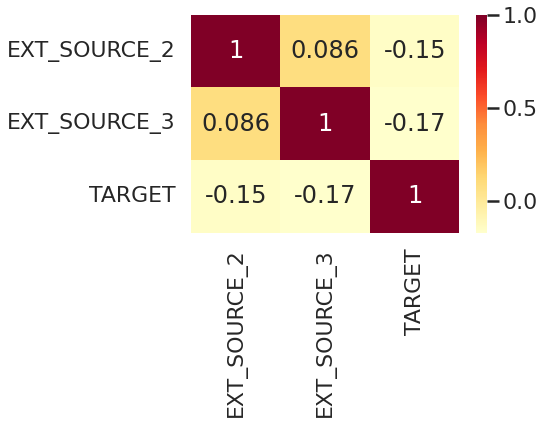

In [328]:
# Checking correlation of EXT_SOURCE_X columns vs TARGET column
Source = application[["EXT_SOURCE_2","EXT_SOURCE_3","TARGET"]]
source_corr = Source.corr()
ax = sns.heatmap(source_corr,xticklabels=source_corr.columns,yticklabels=source_corr.columns,annot = True,cmap ="YlOrRd")

There is no correlation between target column and ext_source columns. So we can drop them.

In [329]:
#Droping ext_source columns from Application Dataset
Source = ["EXT_SOURCE_2","EXT_SOURCE_3"]
application.drop(labels=Source,axis=1,inplace=True)

In [330]:
#Checking Flag Document Relation with Loan Repayment Column
flag = ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

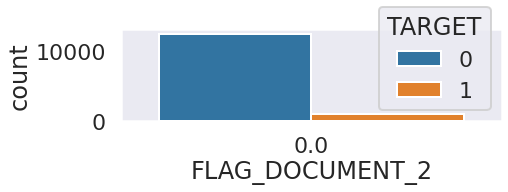

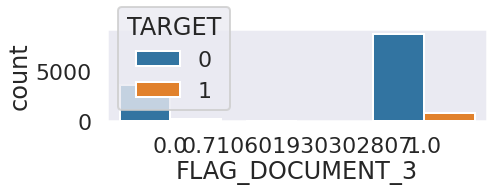

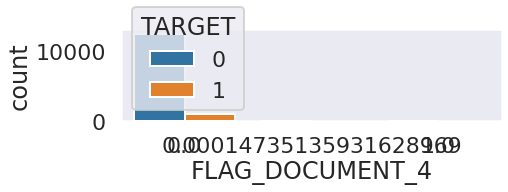

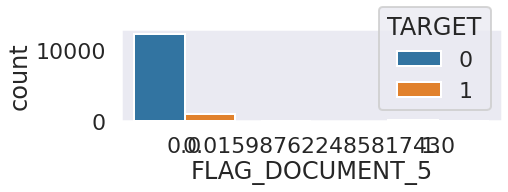

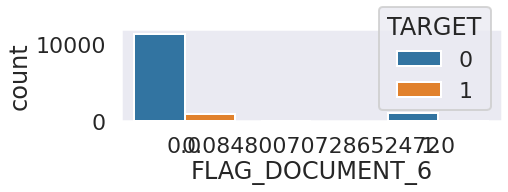

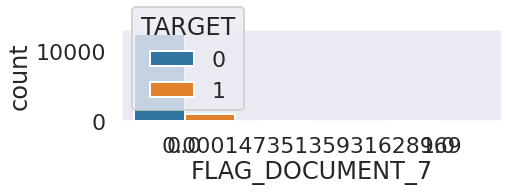

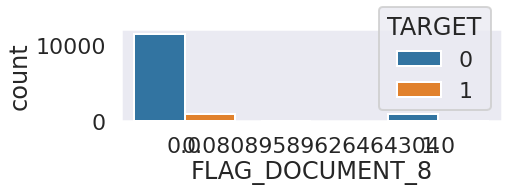

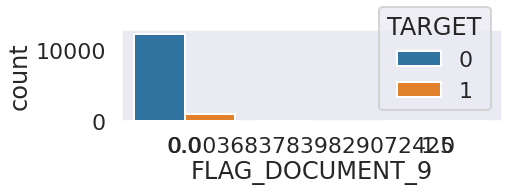

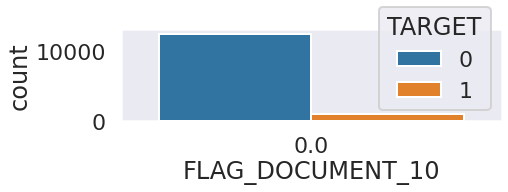

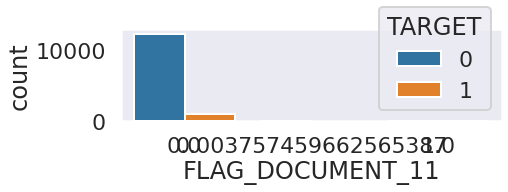

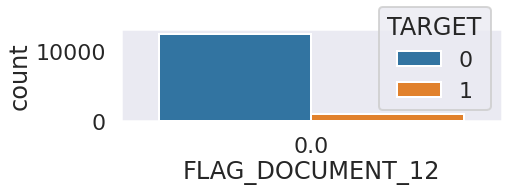

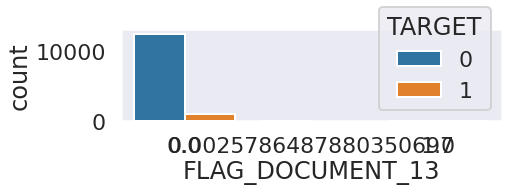

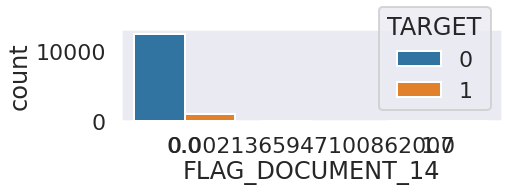

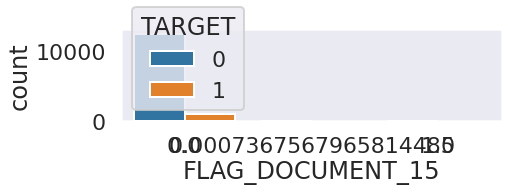

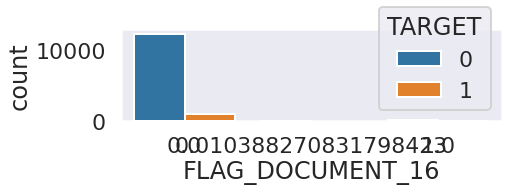

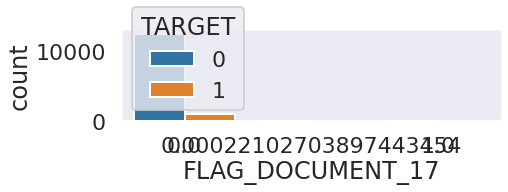

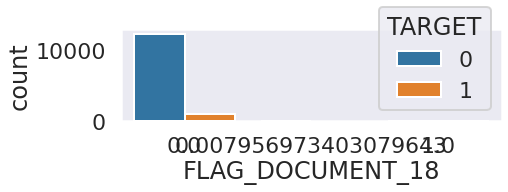

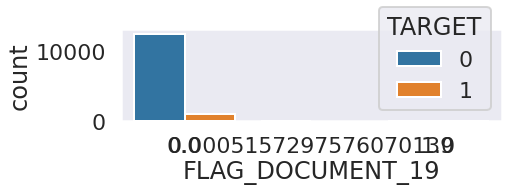

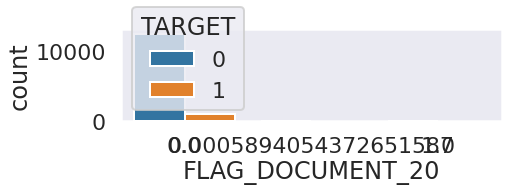

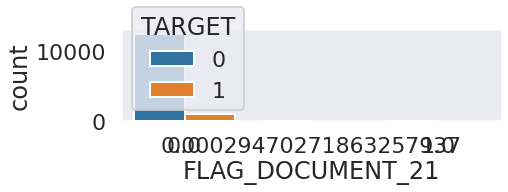

In [331]:
j=0
for i in flag:
    plt.figure(figsize=(15,20))
    plt.subplot(10,2,j+1)
    sns.countplot(application[i],hue = application.TARGET)
    

Mostly in all the plots it shows that clients who applied for loans has not submitted FLAG_DOCUMENT_X except FLAG_DOCUMENT_3. Thus, Except for FLAG_DOCUMENT_3, we can delete rest of the columns. Data shows if borrower has submitted FLAG_DOCUMENT_3 then there is a less chance of defaulting the loan.

In [332]:
flag1 = ['FLAG_DOCUMENT_2','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

In [333]:
#dropping flag document columns from Application Dataset except flag document 3
application.drop(labels=flag1,axis=1,inplace=True)

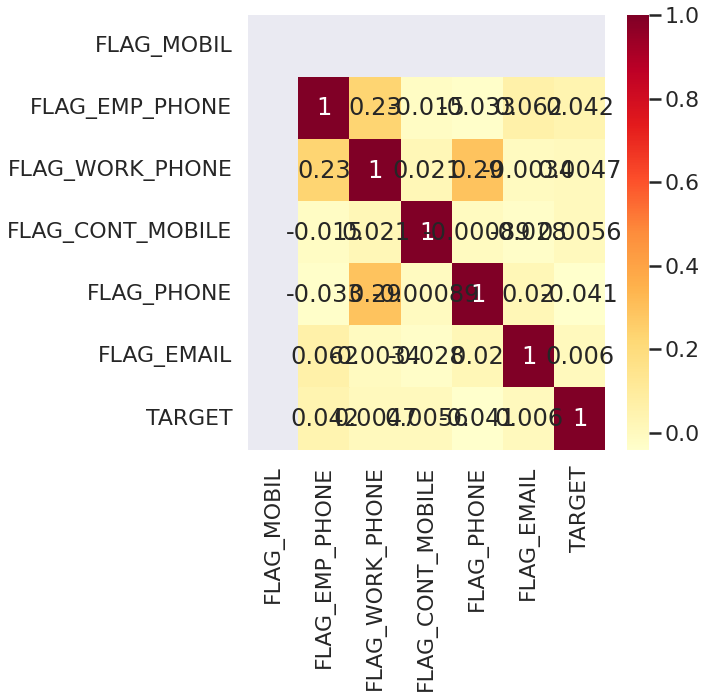

In [334]:
#Checking contact parameters correlation Target Column
contact_col = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','TARGET']
Contact_corr = application[contact_col].corr()
fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(Contact_corr,
            xticklabels=Contact_corr.columns,
            yticklabels=Contact_corr.columns,
            annot = True,
            cmap ="YlOrRd",)

There is negligible correlation between contact parameter columns and target column. Thus, we can drop these columns.

In [335]:
#dropping contact parameter columns from Application Dataset
contact_col = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL']
application.drop(labels=contact_col,axis=1,inplace=True)

In [336]:
application.shape

(13574, 46)

Thus we are left with 46 columns in Application Dataset.

## Removing Negation from day values in Application Dataset


In [337]:

application.DAYS_BIRTH = abs(application.DAYS_BIRTH)
application.DAYS_EMPLOYED = abs(application.DAYS_EMPLOYED)
application.DAYS_REGISTRATION = abs(application.DAYS_REGISTRATION)
application.DAYS_ID_PUBLISH = abs(application.DAYS_ID_PUBLISH)
application.DAYS_LAST_PHONE_CHANGE = abs(application.DAYS_LAST_PHONE_CHANGE)


In [338]:
previous.DAYS_DECISION = abs(previous.DAYS_DECISION)
previous.SELLERPLACE_AREA = abs(previous.SELLERPLACE_AREA)

## Standardize Values

In [339]:
#Converting Days Birth into age groups
application['AGE_GROUP'] = application['DAYS_BIRTH'] // 365
bins = [0,18,30,40,60,80,100]
age_group = ['0-18','18-30','30-40','40-60','60-80','80 and above']
application['AGE_GROUP']=pd.cut(application['AGE_GROUP'],bins=bins,labels=age_group)

In [340]:
application.AGE_GROUP.value_counts()

40-60           6319
30-40           3709
18-30           2283
60-80           1263
80 and above       0
0-18               0
Name: AGE_GROUP, dtype: int64

In [341]:
#Converting DAYS_EMPLOYED into EMPLOYED_Years
application.EMPLOYED_YEARS = application.DAYS_EMPLOYED // 365
bins = [0,5,10,15,20,25,30,35,40,50]
years = ['0-5','5-10','10-15','15-20','20-25','25-30','30-35','35-40','40 and above']
application['EMPLOYED_YEARS'] = pd.cut(application.EMPLOYED_YEARS,bins=bins,labels = years)

In [342]:
application['EMPLOYED_YEARS'].value_counts()

0-5             5431
5-10            2493
10-15           1008
15-20            429
20-25            263
25-30            122
30-35             85
35-40             24
40 and above       3
Name: EMPLOYED_YEARS, dtype: int64

In [343]:
#Converting AMT_INCOME_TOTAL into INCOME_RANGE
bins = [0,50000,100000,150000,200000,250000,300000,350000,400000,500000,1000000]
income = ['0-50000','50000-100000','100000-150000','150000-200000','200000-250000','250000-300000','300000-350000','350000-400000','400000-500000','500000 and above']
application['INCOME_RANGE'] = pd.cut(application.AMT_INCOME_TOTAL,bins=bins,labels = income)

In [344]:
application.INCOME_RANGE.value_counts()

100000-150000       3964
150000-200000       2824
50000-100000        2664
200000-250000       2110
250000-300000        762
300000-350000        410
350000-400000        260
0-50000              235
400000-500000        229
500000 and above     104
Name: INCOME_RANGE, dtype: int64

In [345]:
#Converting AMT_CREDIT into CREDIT_RANGE
bins = [0,50000,100000,150000,200000,250000,300000,350000,400000,500000,600000,700000,800000,900000,1000000,1200000,15000000]
credit = ['0-50000','50000-100000','100000-150000','150000-200000','200000-250000','250000-300000','300000-350000','350000-400000','400000-500000','500000-600000','600000-700000','700000-800000','800000-900000','900000-1000000','1000000-12000000','12000000 and above']
application['CREDIT_RANGE'] = pd.cut(application.AMT_CREDIT,bins=bins,labels = credit)

In [346]:
application.CREDIT_RANGE.value_counts()

400000-500000         1442
500000-600000         1417
250000-300000         1320
12000000 and above    1241
600000-700000         1061
200000-250000         1029
1000000-12000000      1005
800000-900000          974
700000-800000          858
150000-200000          814
300000-350000          708
100000-150000          553
350000-400000          456
900000-1000000         410
50000-100000           261
0-50000                 25
Name: CREDIT_RANGE, dtype: int64

In [347]:
#Creating bins for DAYS_DECISION column
bins = [0,90,180,270,360,450,540,630]
decision = ['0-90','90-180','180-270','270-360','360-450','450-540','540 and above']
previous['DAYS_TOOK_FOR_DECISION'] = pd.cut(previous.DAYS_DECISION,bins=bins,labels=decision)

In [348]:
previous.DAYS_TOOK_FOR_DECISION.value_counts()

180-270          3051
270-360          2950
360-450          2316
90-180           2156
450-540          1869
540 and above    1509
0-90             1400
Name: DAYS_TOOK_FOR_DECISION, dtype: int64

## Merging both the datasets

In [349]:
merged = pd.merge(left=application,right=previous,how='inner',on='SK_ID_CURR')

In [350]:
merged.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_GROUP,EMPLOYED_YEARS,INCOME_RANGE,CREDIT_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_TOOK_FOR_DECISION
0,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932.0,3038.0,4311.0,3458.0,Core staff,1.0,2.0,2.0,THURSDAY,11.0,0.0,0.0,0.0,0.0,1.0,1.0,Religion,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40-60,5-10,100000-150000,500000-600000,2001242,Cash loans,16509.600000,180000.0,180000.0,180000.000000,SUNDAY,14,Y,1,XNA,Approved,865,Cash through the bank,XAP,Repeater,XNA,Cash,walk-in,Regional / Local,1200.0,Consumer electronics,18.000000,high,Cash Street: high,NaN
1,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,1395000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.035792,13778.0,3130.0,1213.0,619.0,Accountants,3.0,2.0,2.0,SUNDAY,16.0,0.0,0.0,0.0,0.0,0.0,0.0,Business Entity Type 3,1.0,0.0,1.0,0.0,1562.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,30-40,5-10,150000-200000,12000000 and above,1413109,Consumer loans,8996.760000,98239.5,98239.5,98239.500000,SATURDAY,18,Y,1,XAP,Approved,449,Cash through the bank,XAP,Repeater,Consumer Electronics,POS,XNA,Regional / Local,164.0,Consumer electronics,12.000000,low_action,POS household without interest,360-450
2,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,477000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,15280.0,2668.0,5266.0,3787.0,Laborers,2.0,2.0,2.0,WEDNESDAY,13.0,0.0,0.0,0.0,0.0,0.0,0.0,Business Entity Type 3,0.0,0.0,0.0,0.0,1634.0,1.0,0.0,0.0,0.0,1.0,0.0,5.0,40-60,5-10,250000-300000,600000-700000,1339797,Cash loans,15419.188029,0.0,0.0,213605.113566,FRIDAY,14,Y,1,XNA,Refused,138,XNA,HC,Repeater,XNA,XNA,XNA,Credit and cash offices,0.0,XNA,15.515065,XNA,Cash,90-180
3,100043,0,Cash loans,F,N,Y,2,198000.0,641173.5,23157.0,553500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.018850,17199.0,768.0,63.0,735.0,Private service staff,4.0,2.0,2.0,THURSDAY,13.0,0.0,0.0,0.0,0.0,0.0,0.0,Other,0.0,0.0,0.0,0.0,2411.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,40-60,0-5,150000-200000,600000-700000,1185699,Consumer loans,5287.815000,35775.0,33340.5,35775.000000,MONDAY,11,Y,1,XAP,Approved,2411,Cash through the bank,XAP,New,Mobile,POS,XNA,Country-wide,44.0,Connectivity,8.000000,low_normal,POS mobile with interest,NaN
4,100072,0,Cash loans,M,N,N,0,180000.0,1080000.0,44118.0,1080000.0,Unaccompanied,Working,Incomplete higher,Single / not married,With parents,0.010006,7907.0,1324.0,4557.0,586.0,Sales staff,1.0,2.0

In [351]:
merged.shape

(1032, 76)

## Uni-Variate Analysis of Merged Dataset 

In [352]:
def count(figsize,x,title,r):
    plt.figure(figsize = figsize)
    sns.set_style('darkgrid')
    sns.set_context('poster')
    plt.title(title)
    sns.countplot(x)
    plt.yscale('log')
    plt.xticks(rotation=r)
    plt.show()

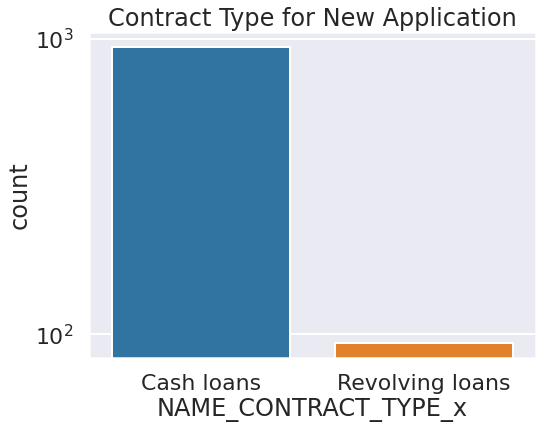

In [353]:
#Plotting Contract Type of Loan
count((8,6),merged.NAME_CONTRACT_TYPE_x,'Contract Type for New Application',0)

* inference 1 = Count of cash loans is highest. Which is more than 1M.
* inference 2 = Count of revolving loans. Which is slightly above 100k.

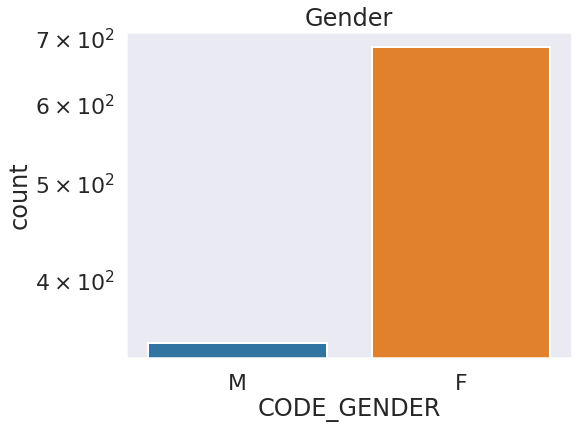

In [354]:
#Plotting Gender of Applicant
count((8,6),merged.CODE_GENDER,'Gender',0)

* inference 1 = Count of Female is more than Male for New Application for loan.

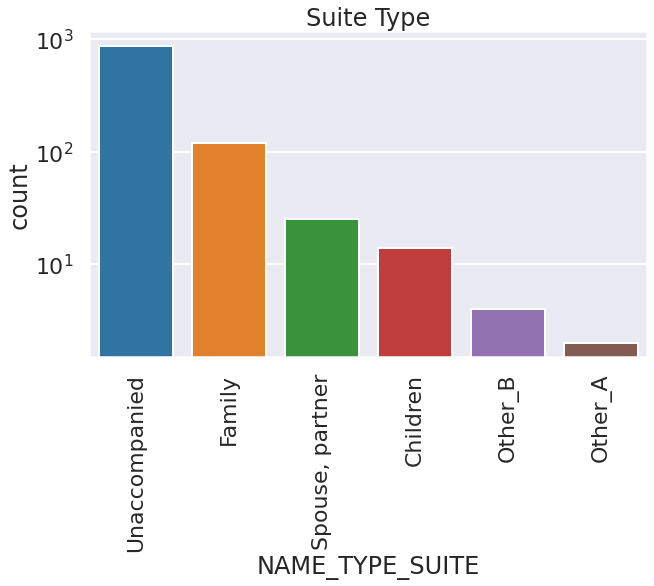

In [355]:
#Plotting Suite Type of Applicant
count((10,6),merged.NAME_TYPE_SUITE,'Suite Type',90)

* inference 1 = People where mostly unaccompained while applying for loan.
* inference 2 = Very less people came with group of peopel to applly for loan.

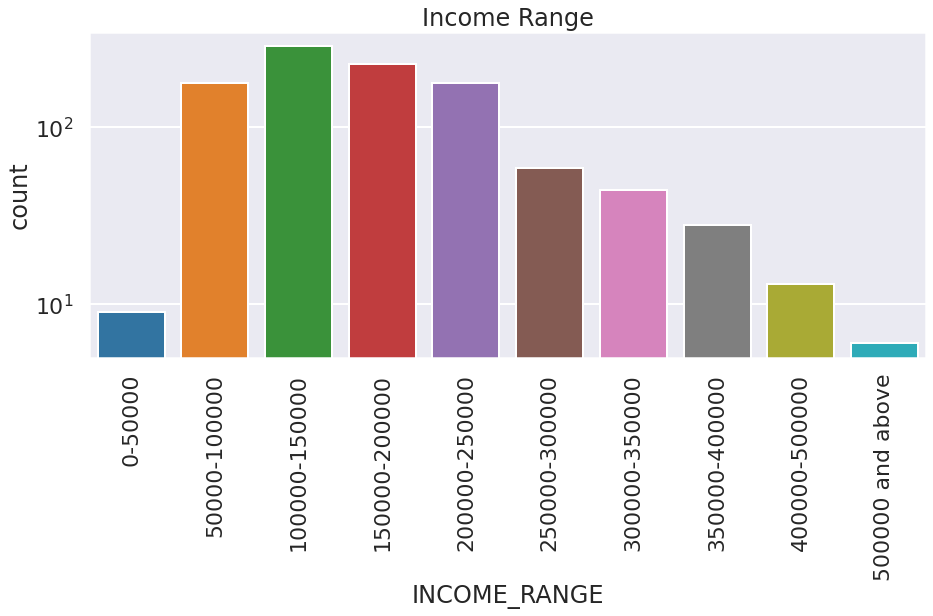

In [356]:
#Plotting Income Range of Applicant
count((15,6),merged.INCOME_RANGE,'Income Range',90)

* inference 1 = Applicants are higly having income ranges of (100000-150000),(150000-200000) and (200000-250000).
* inference 2 = Bottom 3 ranges of income are (0-50000),(500000 and above) and (400000-500000).

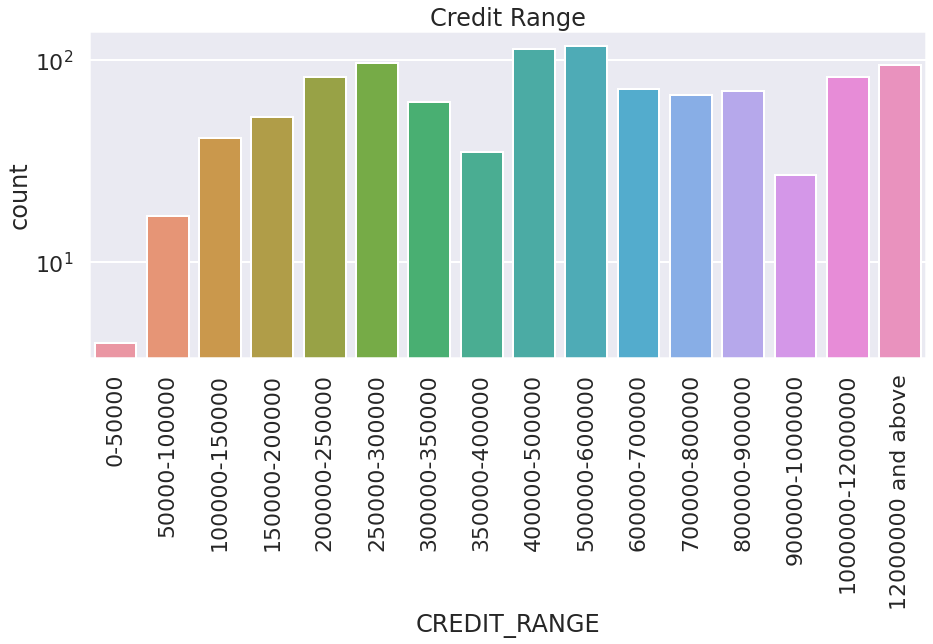

In [357]:
# Plotting Credit Range of Applicant 
count((15,6),merged.CREDIT_RANGE,'Credit Range',90)

* inference 1 = Top 3 credit ranges in this merged dataset are (250000-300000),(400000-500000) and (500000-600000).
* inference 2 = Applicant having (0-50000) credit range are least in number.

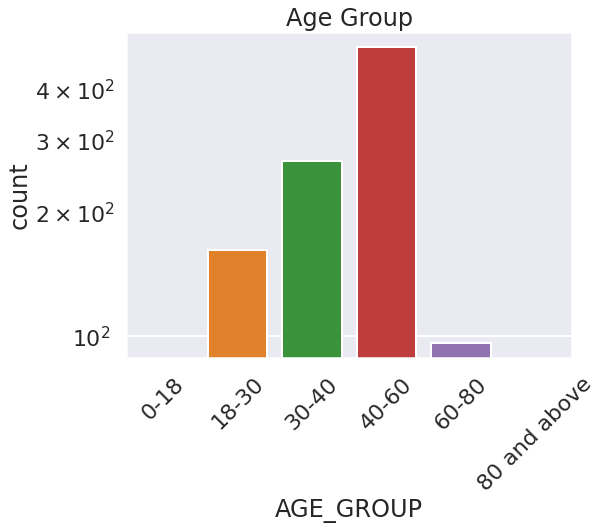

In [358]:
#Plotting Age group of Applicant
count((8,6),merged.AGE_GROUP,"Age Group",45)

* inference 1 = Count of people in age group (40-60) is highest amongst other age groups in this merged dataset.
* inference 2 = Count of people in age group (60-80) is lowest amongst other age groups in this merged dataset..

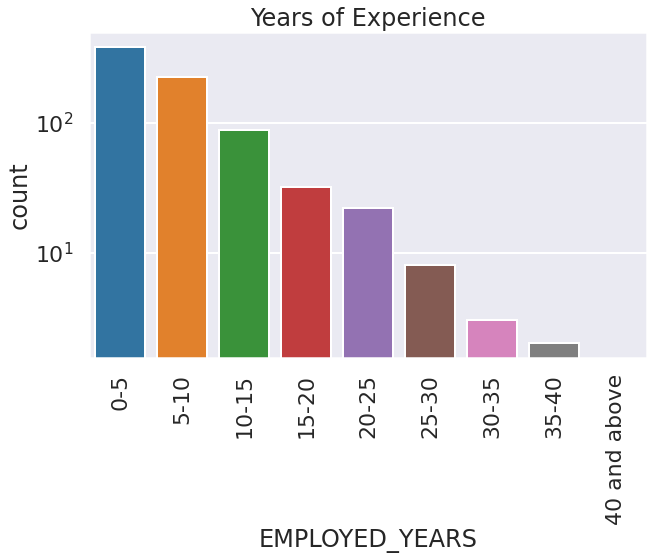

In [359]:
# Plotting Work Experience of Applicant
count((10,6),merged.EMPLOYED_YEARS,'Years of Experience',90)

* inference 1 = Count of people having experience between 0-5 is highest.
* inference 2 = As the years of experience increases, the count of people decreases.

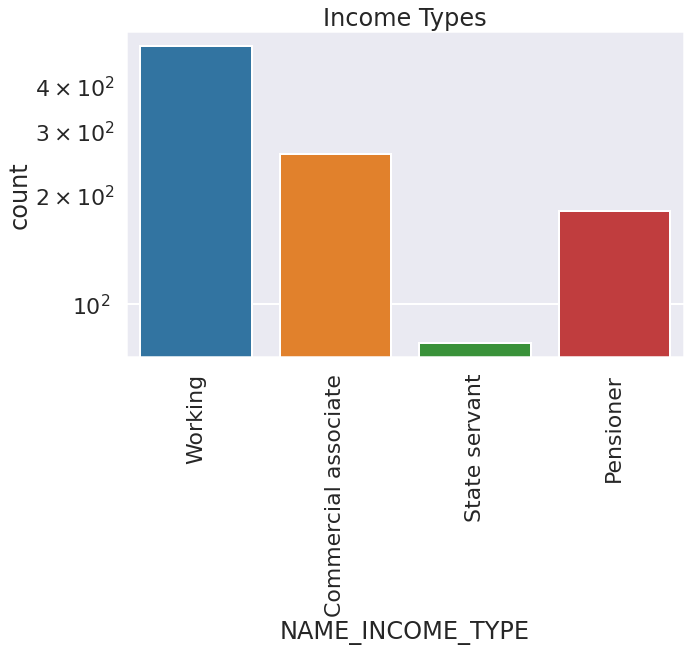

In [360]:
#Plotting Types of Income of Applicant
count((10,6),merged.NAME_INCOME_TYPE,'Income Types',90)

* inference 1 = Count of people having income type "Working" is the highest.
* inference 2 = Counts of people on maternity leave and people who are student are lowest.

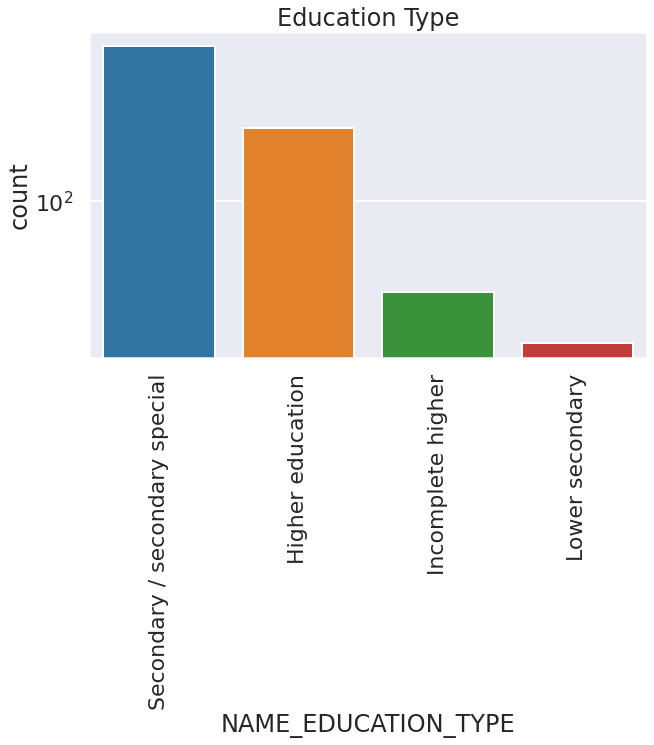

In [361]:
# Plotting Applicant's Education Type
count((10,6),merged.NAME_EDUCATION_TYPE,'Education Type',90)

* inference 1 = Count of people having secondary/secondary special is highest.
* inference 2 = Count of people having academic degree is lowest.

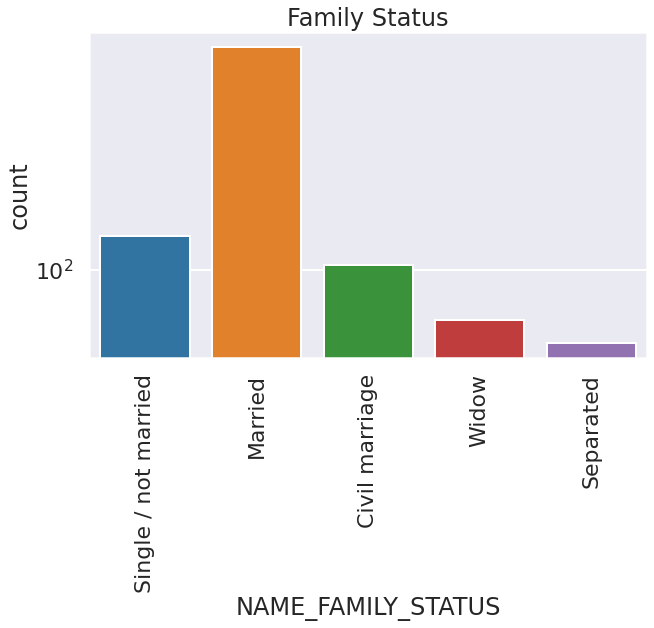

In [362]:
# Plotting Maritial Status of Applicant
count((10,6),merged.NAME_FAMILY_STATUS,"Family Status",90)

* inference 1 = Count of people who are married is highest.
* inference 2 = Count of poeple who are widow is lowest.

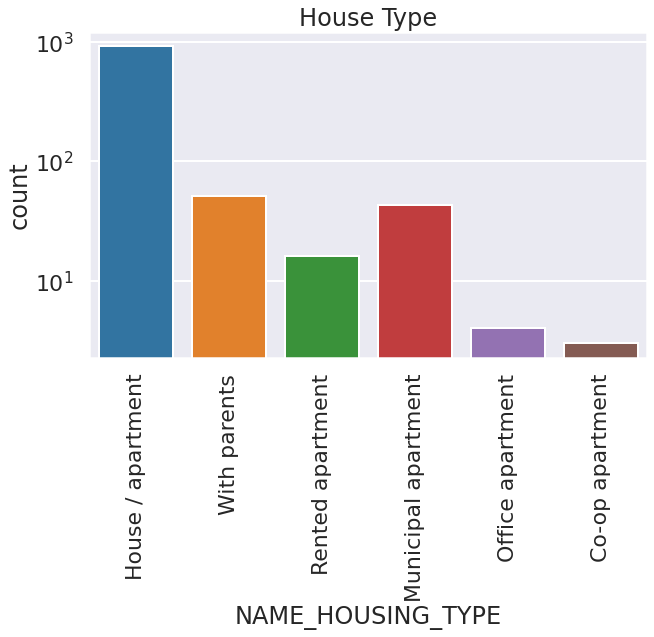

In [363]:
# Plotting Housing Type of Applicant
count((10,6),merged.NAME_HOUSING_TYPE,'House Type',90)

* inference 1 = Most of the people are having House/Apartment.
* inference 2 = There are very less people having Co-op apartment.

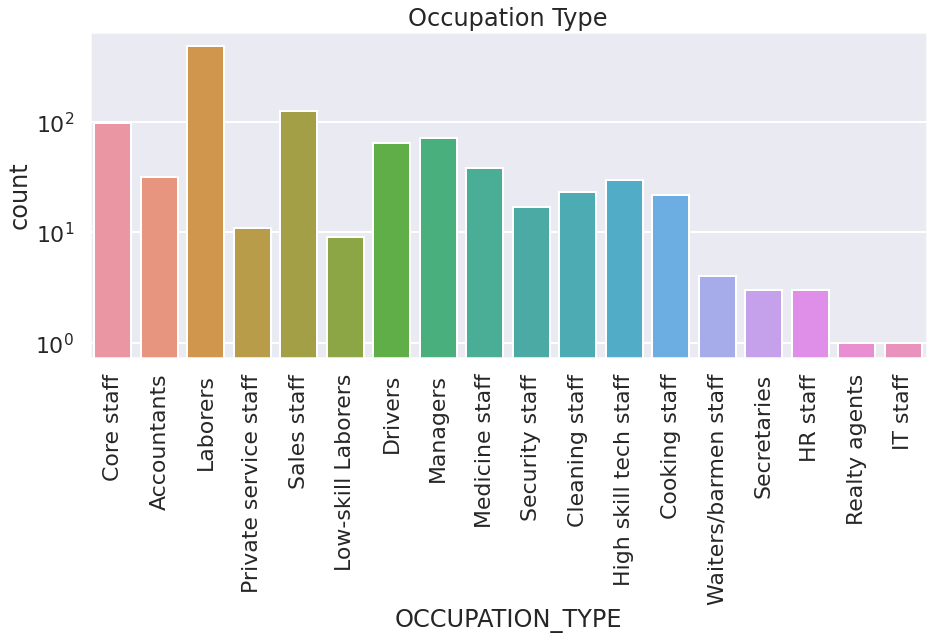

In [364]:
# Plotting Occupation Type of Applicant
count((15,6),merged.OCCUPATION_TYPE,'Occupation Type',90)

* inference 1 = Count of people having laborer type occupation is highest. Secong highest count is of people having sales staff occuptation.
* inference 2 = IT staff and HR staff occupation type has least count.

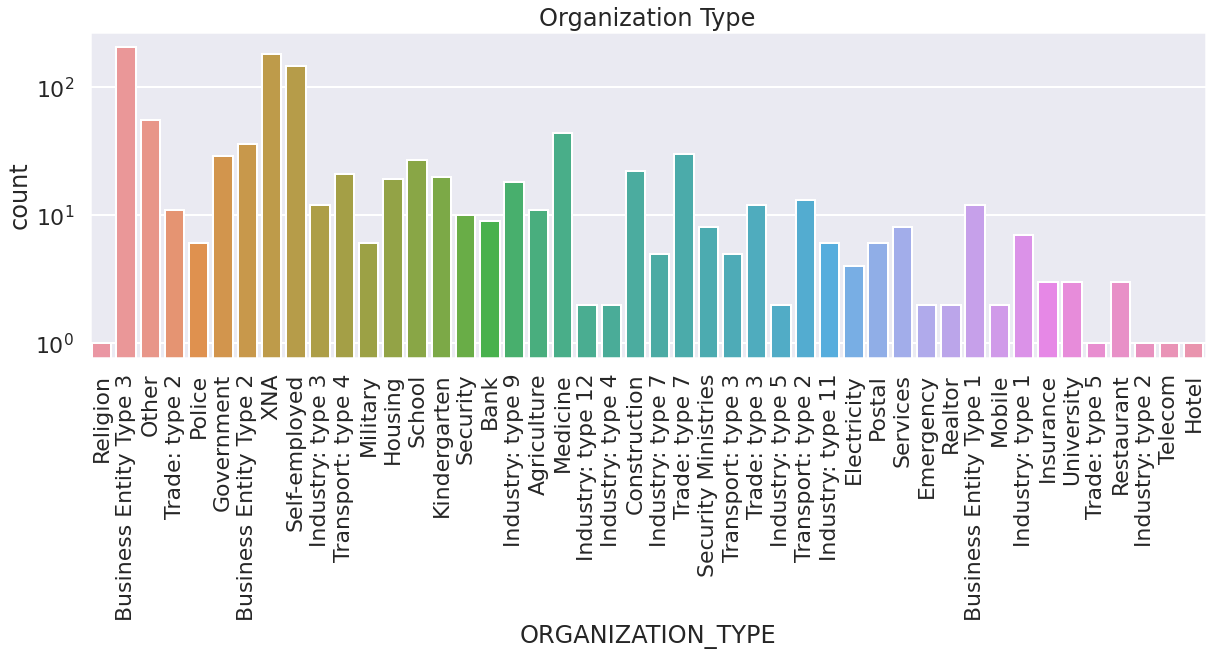

In [365]:
# Plotting Organization Type where Applicant Work
count((20,6),merged.ORGANIZATION_TYPE,'Organization Type',90)

* inference 1 = Count of people working in Business Entity Type 3 is highest. 
* inference 2 = Count of XNA which means Not Applicable is second highest.Which means that many people's organization type is unknown.
* inference 3 = Count of people working in Industrial type 8 is lowest.

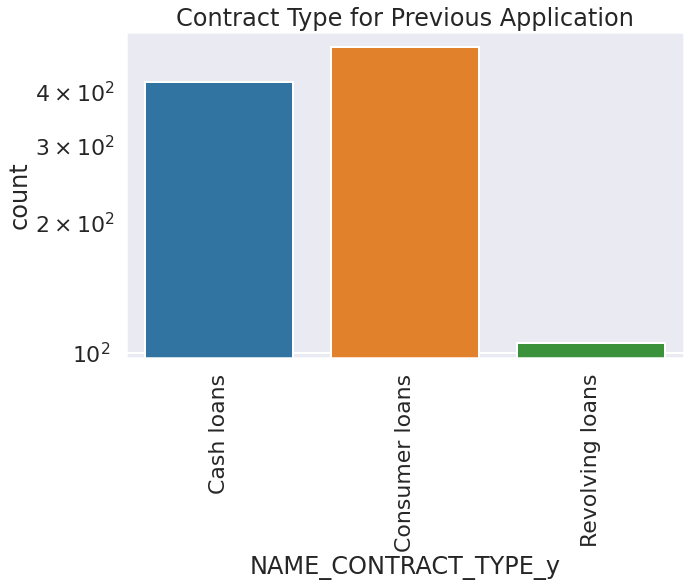

In [366]:
#Plotting Previous Contract Type of Applicant 
count((10,6),merged.NAME_CONTRACT_TYPE_y,'Contract Type for Previous Application',90)

* inference 1 = Previously, people mostly applied for either consumer loan or cash loan.

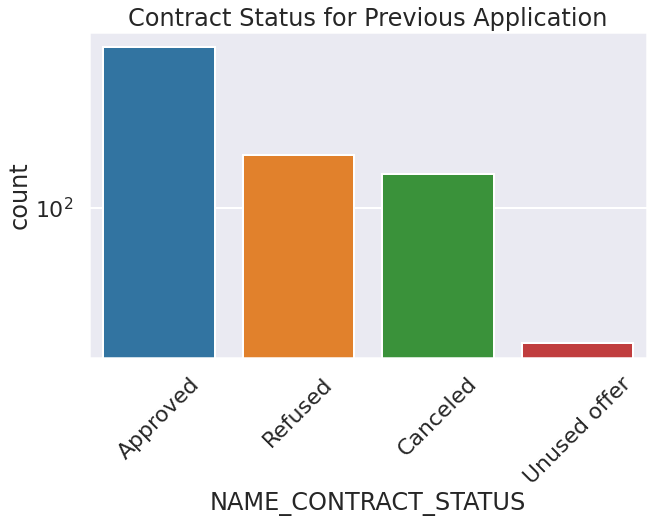

In [367]:
# Plotting Contract Status for Precious Application for Loan
count((10,6),merged.NAME_CONTRACT_STATUS,'Contract Status for Previous Application',45)

* inference 1 = Previously, most of the loans were approved.
* inference 2 = Count of canceled loans and refused loans are almost same.

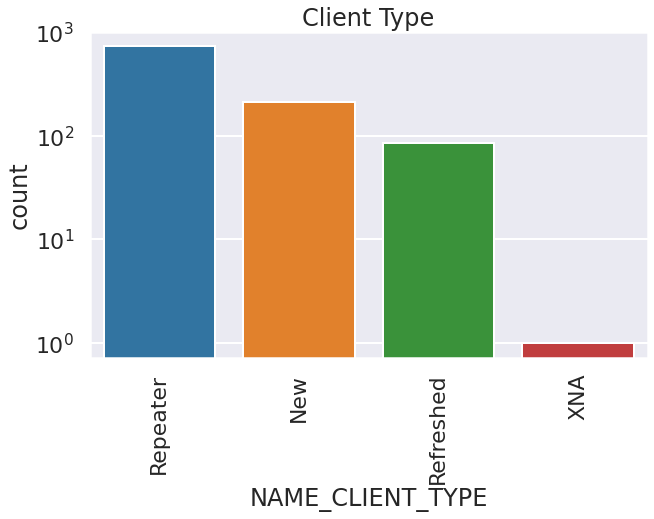

In [368]:
#Plotting Client Type of Previous Application
count((10,6),merged.NAME_CLIENT_TYPE,'Client Type',90)

* inference 1 = People who applied for loans repeatedly are more in number than new people applying for loan.

## Checking for Outliers

In [369]:
def box(col_name,title):
    sns.boxplot(col_name)
    sns.set_style('darkgrid')
    plt.xscale('log')
    plt.title(title)

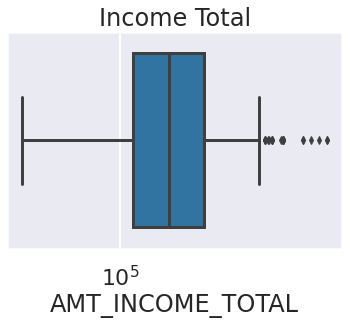

In [370]:
#Plotting boxplot for Income Total
box(merged.AMT_INCOME_TOTAL,'Income Total')

* inference 1 = There are few outliers in this column.
* inference 2 = Majority of income total data lies before 1M.


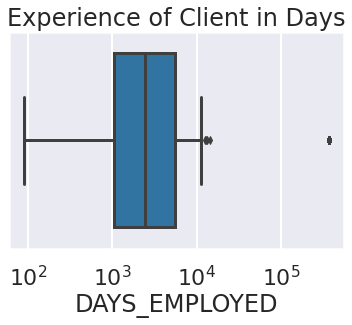

In [371]:
#Plottting boxplot for experience of client
box(merged.DAYS_EMPLOYED,'Experience of Client in Days')

* inference 1 = There is one outlier beyond 100k in this column.
* inference 2 = The 25% of data lies around 1k.

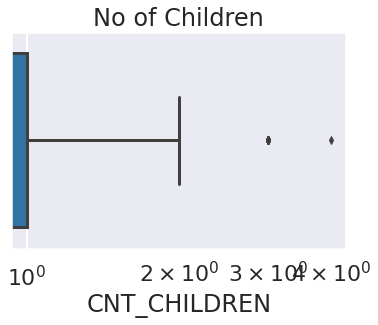

In [372]:
# Plotting boxplot for CNT_CHILDREN
box(merged.CNT_CHILDREN,'No of Children')

* inference 1 = There are many outliers in this column.
* inference 2 = 50% of the children count is equal to 0.

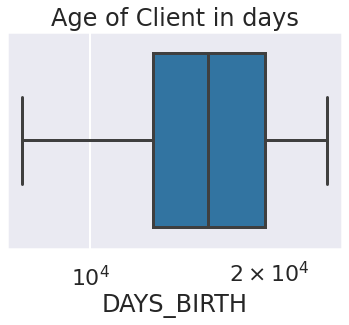

In [373]:
# Plotting boxplot for Age of Client in days
box(merged.DAYS_BIRTH,'Age of Client in days')

* inference 1 = There are no outliers.

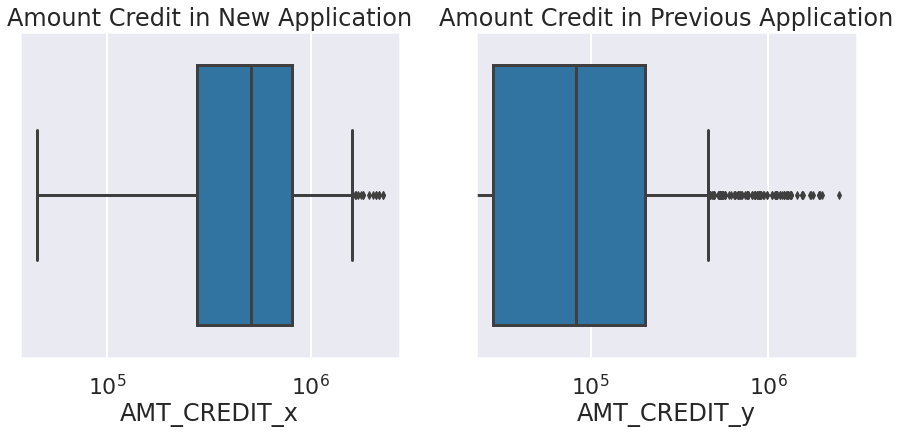

In [374]:
#Plotting boxplots for Amount Credit in New Apllication and Amount Credit in Previous Application
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
box(merged.AMT_CREDIT_x,'Amount Credit in New Application')

plt.subplot(1,2,2)
box(merged.AMT_CREDIT_y,"Amount Credit in Previous Application")

* inference 1 = There is one outlier in amount credit in new applciation.
* inference 2 = Most of the values are in continuous form in both the boxplots.

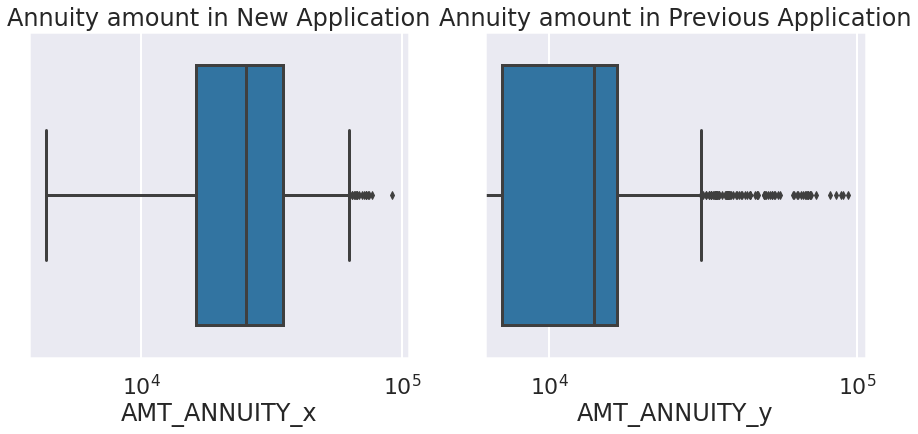

In [375]:
#Plotting boxplots for Annuity Amount in New Apllication and Annuity Amount in Previous Application
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
box(merged.AMT_ANNUITY_x,'Annuity amount in New Application')

plt.subplot(1,2,2)
box(merged.AMT_ANNUITY_y,"Annuity amount in Previous Application")

* inference 1 = There are few outliers in annuity amount in previous applciation.
* inference 2 = Most of the data is in continuous form.

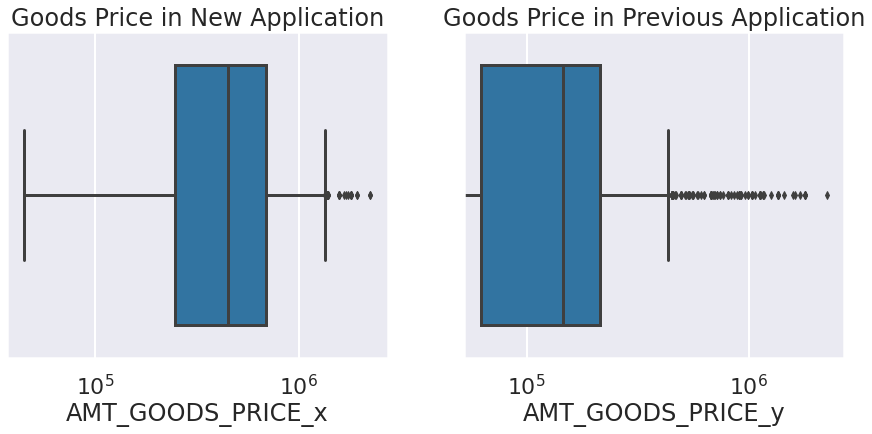

In [376]:
#Plotting boxplot for Goods Price in New and Previous Application
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
box(merged.AMT_GOODS_PRICE_x,'Goods Price in New Application')
plt.subplot(1,2,2)
box(merged.AMT_GOODS_PRICE_y,'Goods Price in Previous Application')

* inference 1 = There is one outlier in amoung good price in previous application.
* inference 2 = The rest of the data in both the boxplot are in continuous form.

## Segmented Uni-variate Analysis

In [377]:
def uni(df,col,title,hue =None):
    
    sns.set_style('dark')
    sns.set_context('poster')
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=90)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette="YlGnBu") 
        
    plt.show()

### Plotting graphs for dataset having target values

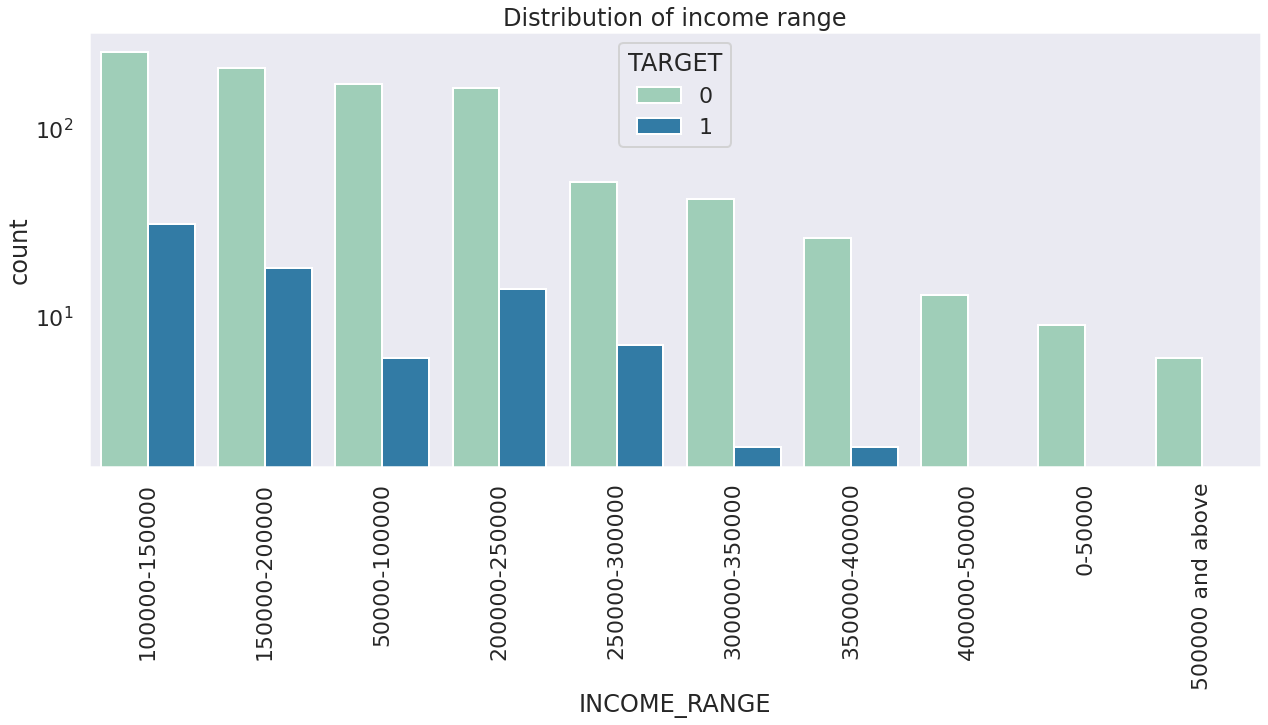

In [378]:
#Plotting DIstribution of Income Range for Target Column
uni(merged,col='INCOME_RANGE',title='Distribution of income range',hue='TARGET')


* inference 1 = Client having income 500000 or above are least defaulters..
* inference 2 = Majorly of client in income range of 50000-250000 are more likely to default loan.

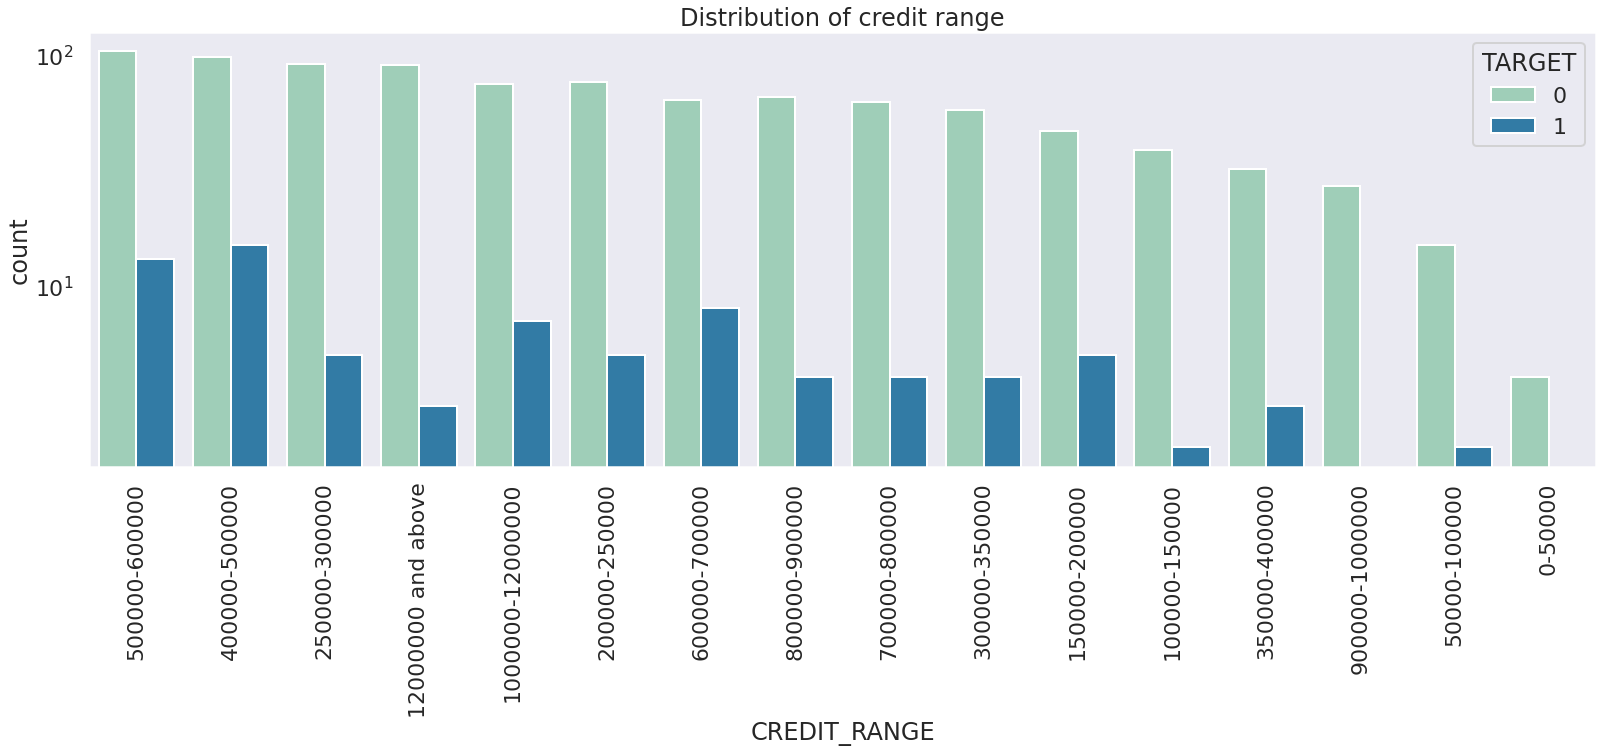

In [379]:
#Plotting Distribution of Credit Range for Target Column
uni(merged,col='CREDIT_RANGE',title='Distribution of credit range',hue='TARGET')


* inference 1 = Client having 0-50000 credit range are least to be a defaulter.
* inference 2 = Clients are found to be defaulters in almost all the credit range except 0-50000.

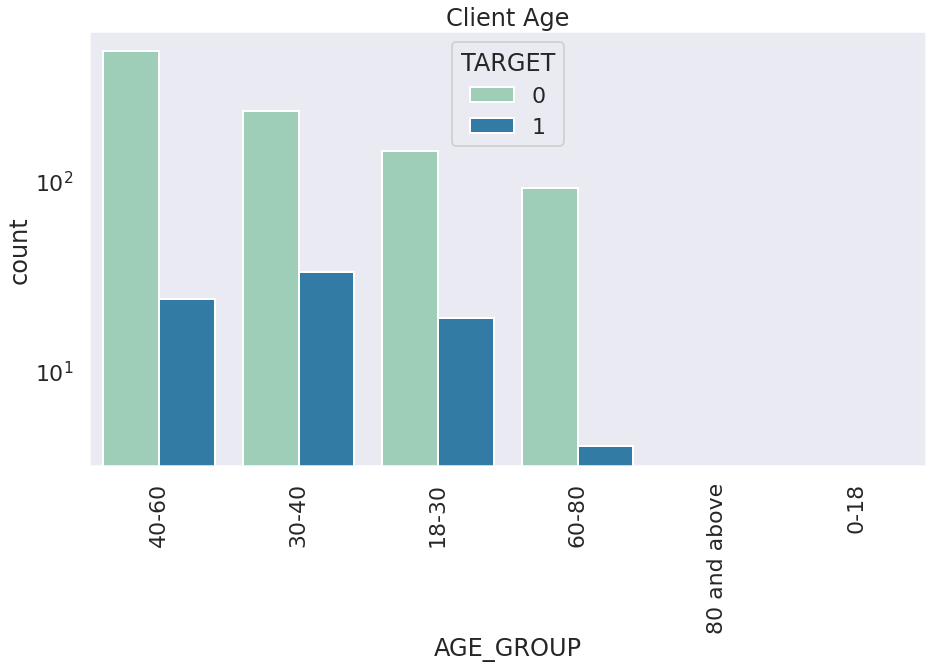

In [380]:
#Plotting Age Group of client
uni(merged,col='AGE_GROUP',title='Client Age',hue='TARGET')


* inference 1 = Client having age between 40-60 are more likely to be a defaulter.
* inference 2 = Client with age between 60-80 are least to be a defaulter.

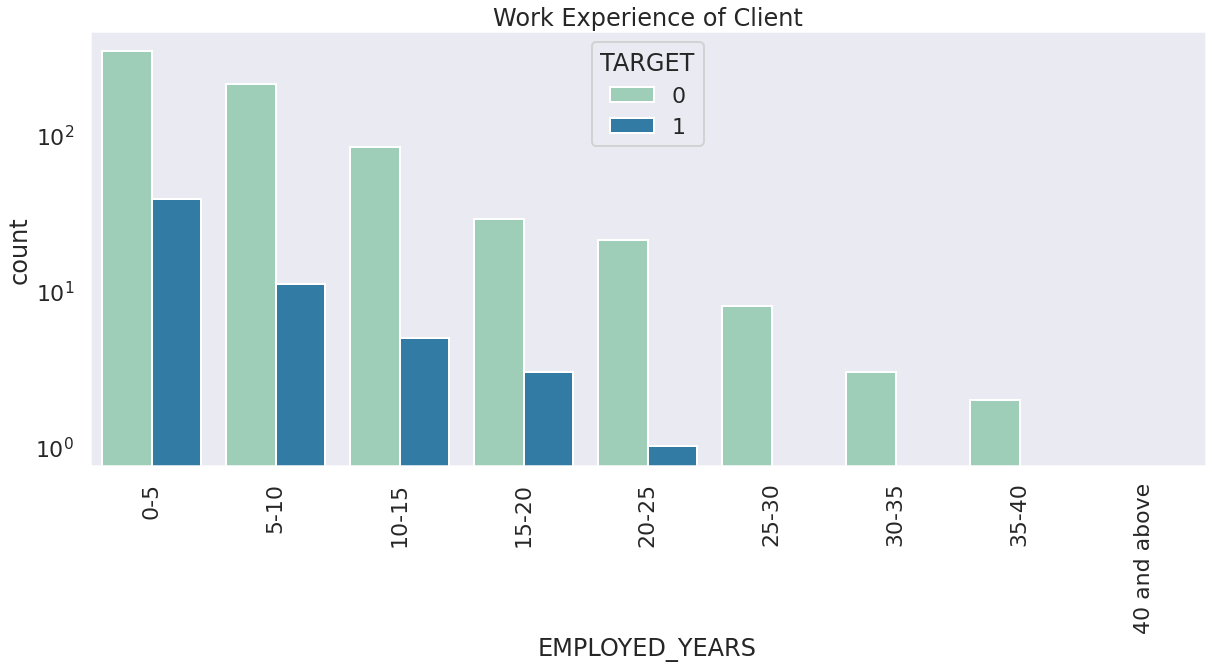

In [381]:
#Plotting Client's Work Experience
uni(merged,col='EMPLOYED_YEARS',title='Work Experience of Client',hue='TARGET')


* inference 1 = Clients having work experience of 0-5 are mostly likely to form a defaulter.
* inference 2 = As the years of work experience increases, client becomes less likely to be a defaulter.

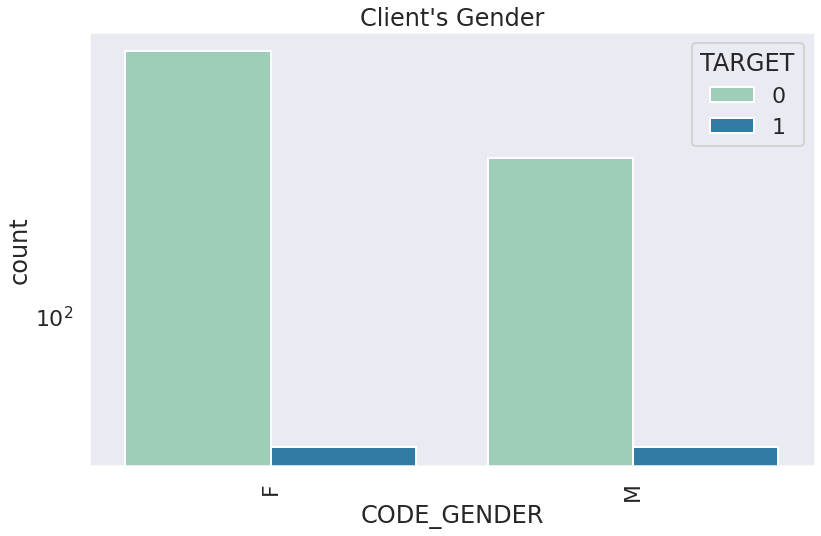

In [382]:
#Plotting Client's Gender
uni(merged,col='CODE_GENDER',title="Client's Gender",hue='TARGET')


* inference 1 = Female clients are more likely to be a defaulter than male clients.
* inference 2 = Also female clients are good repayers of loans than male clients.

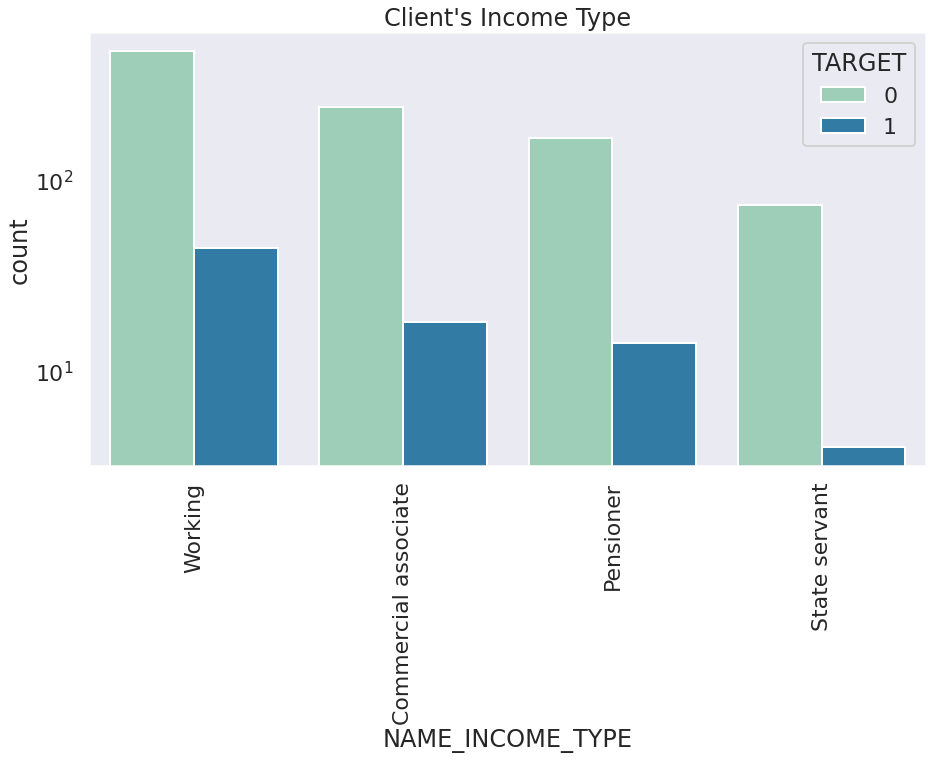

In [383]:
#Plotting Client's Income Type
uni(merged,col='NAME_INCOME_TYPE',title="Client's Income Type",hue='TARGET')


* inference 1 = Client who are working to earn income are more likely to be a defaulter.
* inference 2 = Also client on maternity leave are mostly a defaulter.
* inference 3 = Unemployed clients repayment to default ratio is highest. 

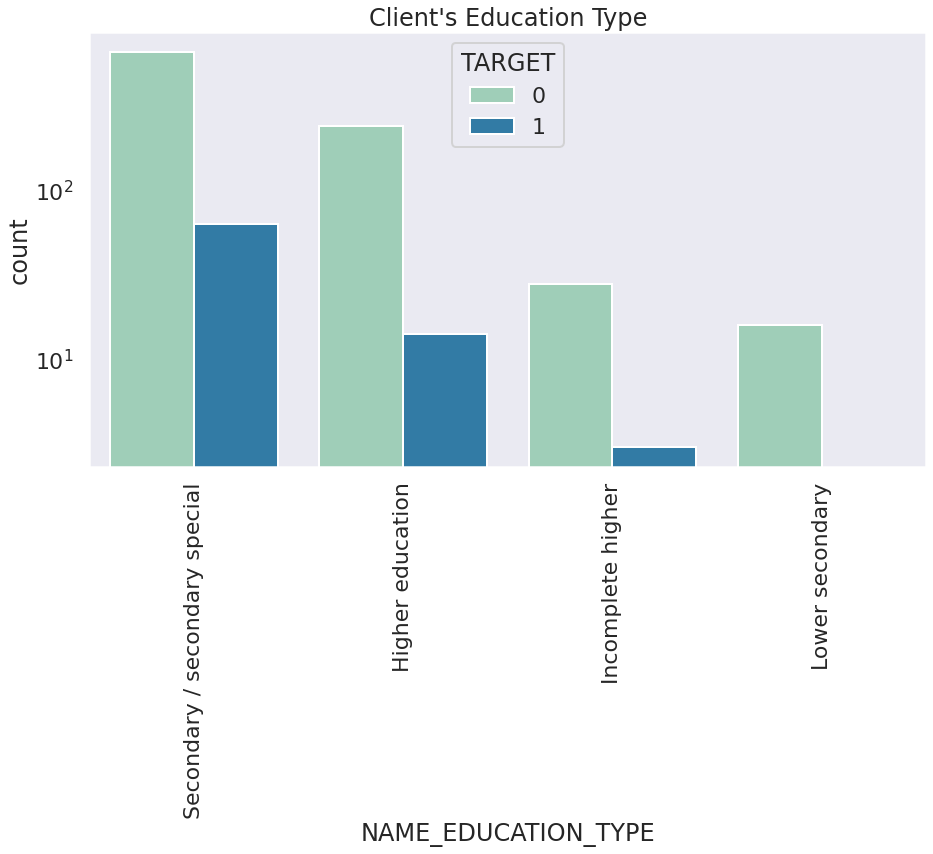

In [384]:
#Plotting Client's Education Type
uni(merged,col='NAME_EDUCATION_TYPE',title="Client's Education Type",hue='TARGET')


* inference 1 = Client having Secondary/Secondary Special education are most likely to default the loan.
* inference 2 = Client with academic degrees are least likely to default the loan.

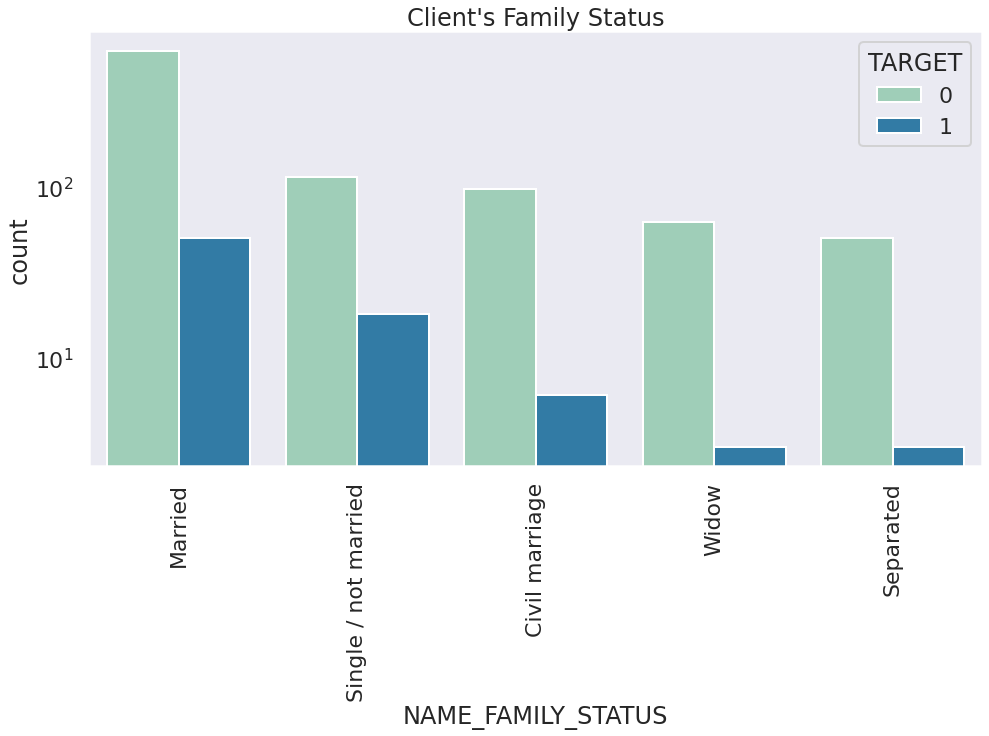

In [385]:
#Plotting Client's Family Status
uni(merged,col='NAME_FAMILY_STATUS',title="Client's Family Status",hue='TARGET')

* inference 1 = Widow and Separated Clients are least likely to be a defaulter.
* inference 2 = Married Clients are mostly likely to be a defaulter.

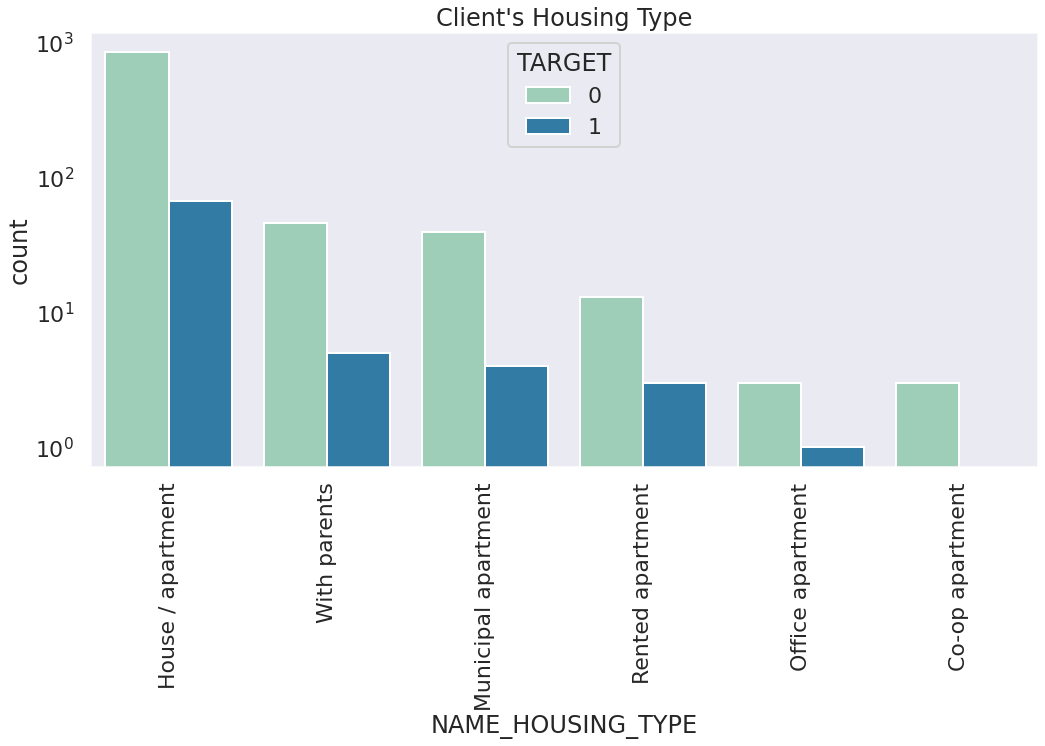

In [386]:
#Plotting Client's Housing Type
uni(merged,col='NAME_HOUSING_TYPE',title="Client's Housing Type",hue='TARGET')


* inference 1 = Clients having Co-op apartment housing type are least likely to be a defaulter.
* inference 2 = Clients having own house/apartment are more likely to be a defaulter.

## Dividing Merged Dataset based on Target value (0,1)

In [387]:
merged0 = merged[merged.TARGET == 0]
merged1 = merged[merged.TARGET == 1]

In [388]:
round(len(merged0)/len(merged1),2)

11.9

The ratio of imbalance between merged0 and merged1 is 11.9

## Finding correlation amongst numerical columns where Target = 0

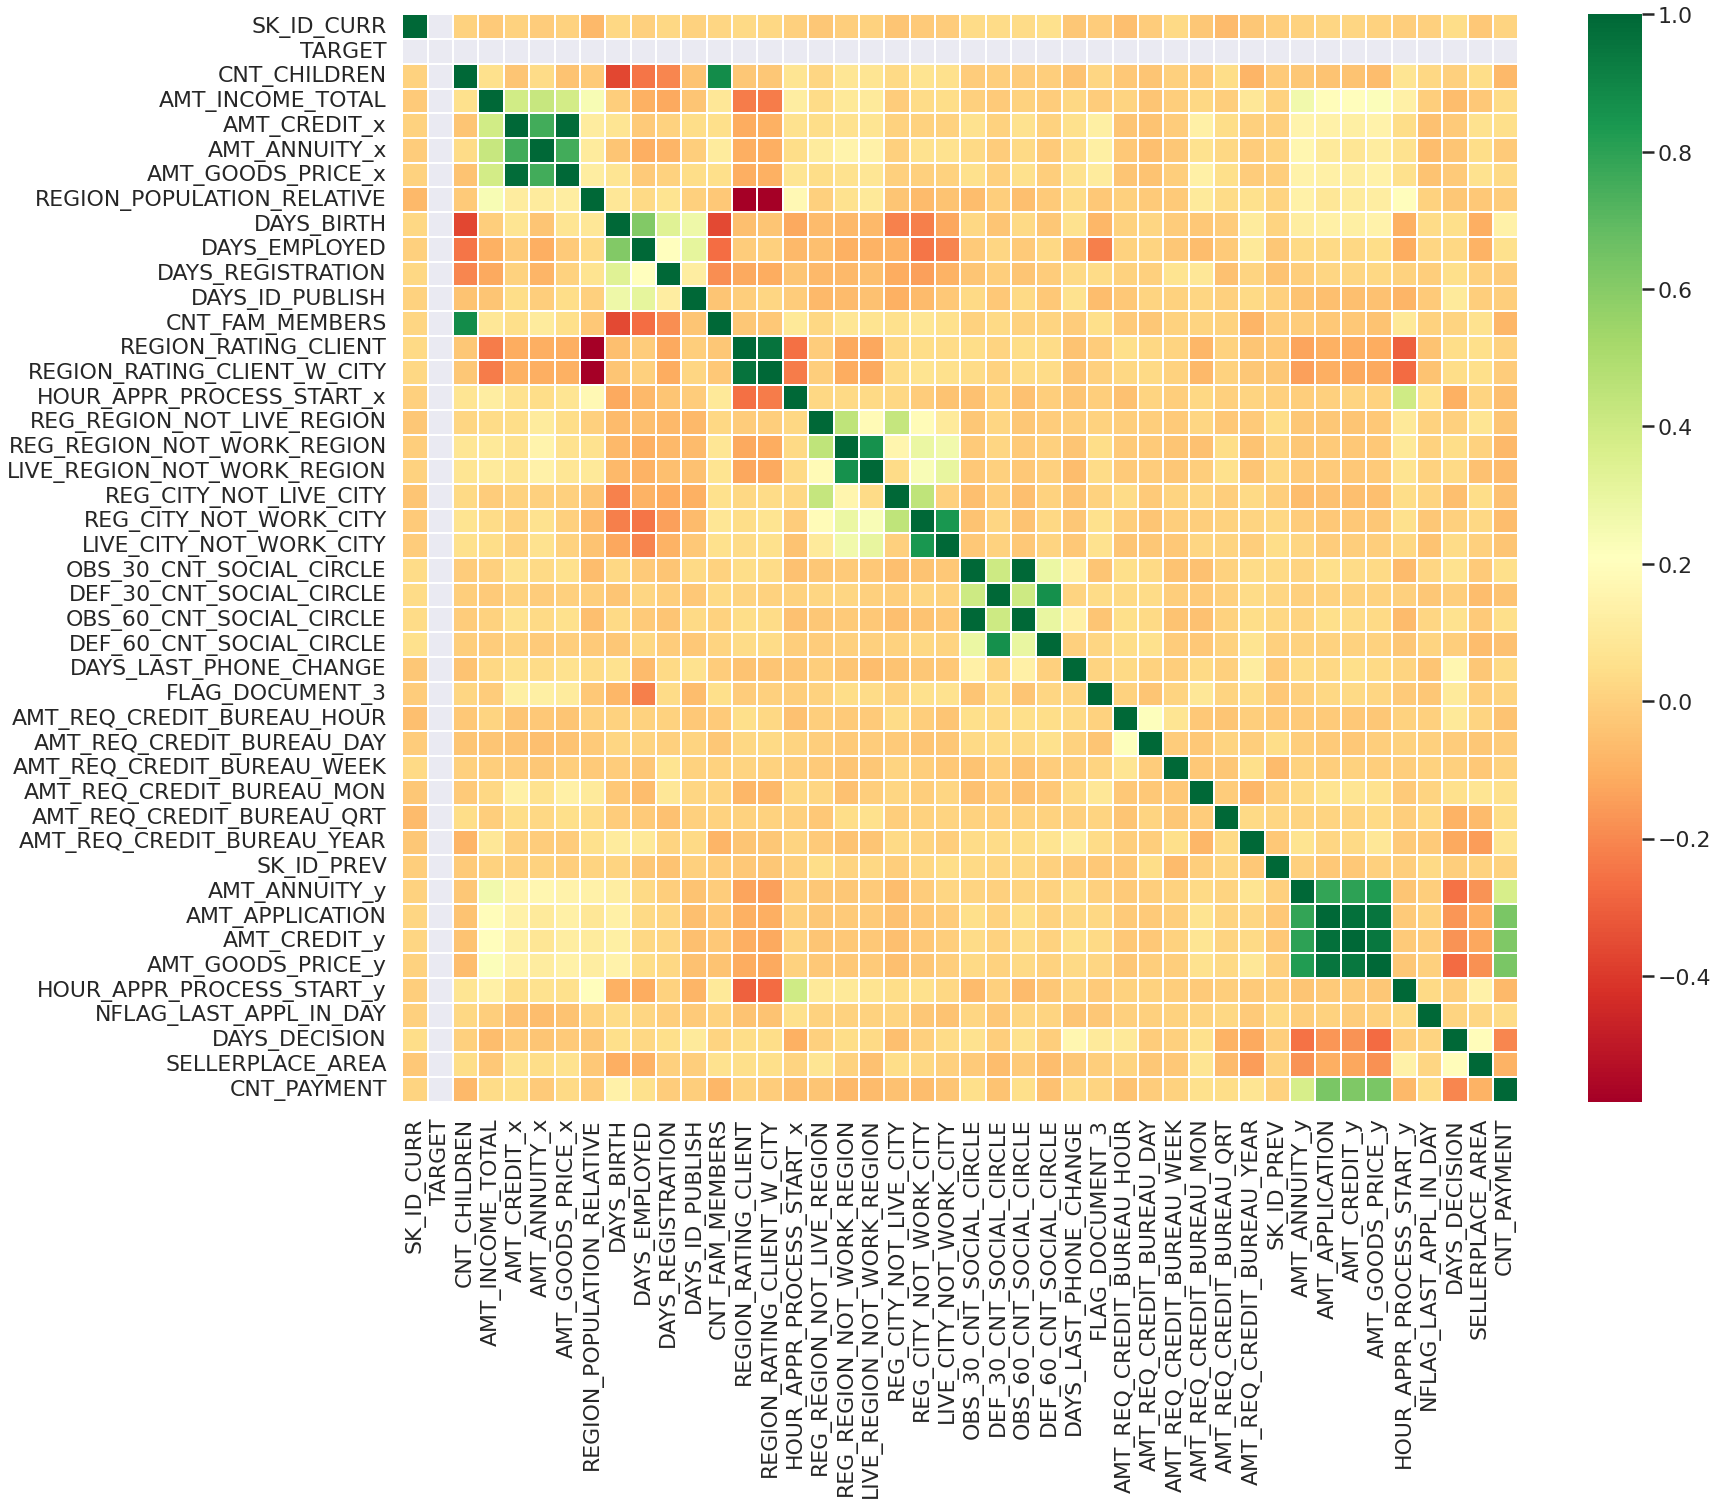

In [389]:
plt.figure(figsize=(25,20))
sns.heatmap(merged0.corr(), cmap="RdYlGn",annot=False,linewidth =1)
plt.show()

In [390]:
#top 10 Correlation for target - 0
correlation_0_target = merged0.corr()
correlation_0_target = correlation_0_target.where(np.triu(np.ones(correlation_0_target.shape), k=1).astype(np.bool))
correlation_0_target = correlation_0_target.unstack().reset_index().dropna(subset = [0])
correlation_0_target.columns = ['VAR1', 'VAR2', 'Correlation_Value']
correlation_0_target['Corr_abs'] = abs(correlation_0_target['Correlation_Value'])
correlation_0_target.sort_values(by = "Corr_abs", ascending =False, inplace = True)
correlation_0_target.head(10)


,VAR1,VAR2,Correlation_Value,Corr_abs
1078,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998409,0.998409
268,AMT_GOODS_PRICE_x,AMT_CREDIT_x,0.985471,0.985471
1664,AMT_CREDIT_y,AMT_APPLICATION,0.971484,0.971484
629,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.960571,0.960571
1708,AMT_GOODS_PRICE_y,AMT_APPLICATION,0.954199,0.954199
1709,AMT_GOODS_PRICE_y,AMT_CREDIT_y,0.945814,0.945814
530,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878464,0.878464
1123,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.868548,0.868548
809,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.862511,0.862511
944,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.844116,0.844116


## Finding correlation amongst numerical columns where Target = 1

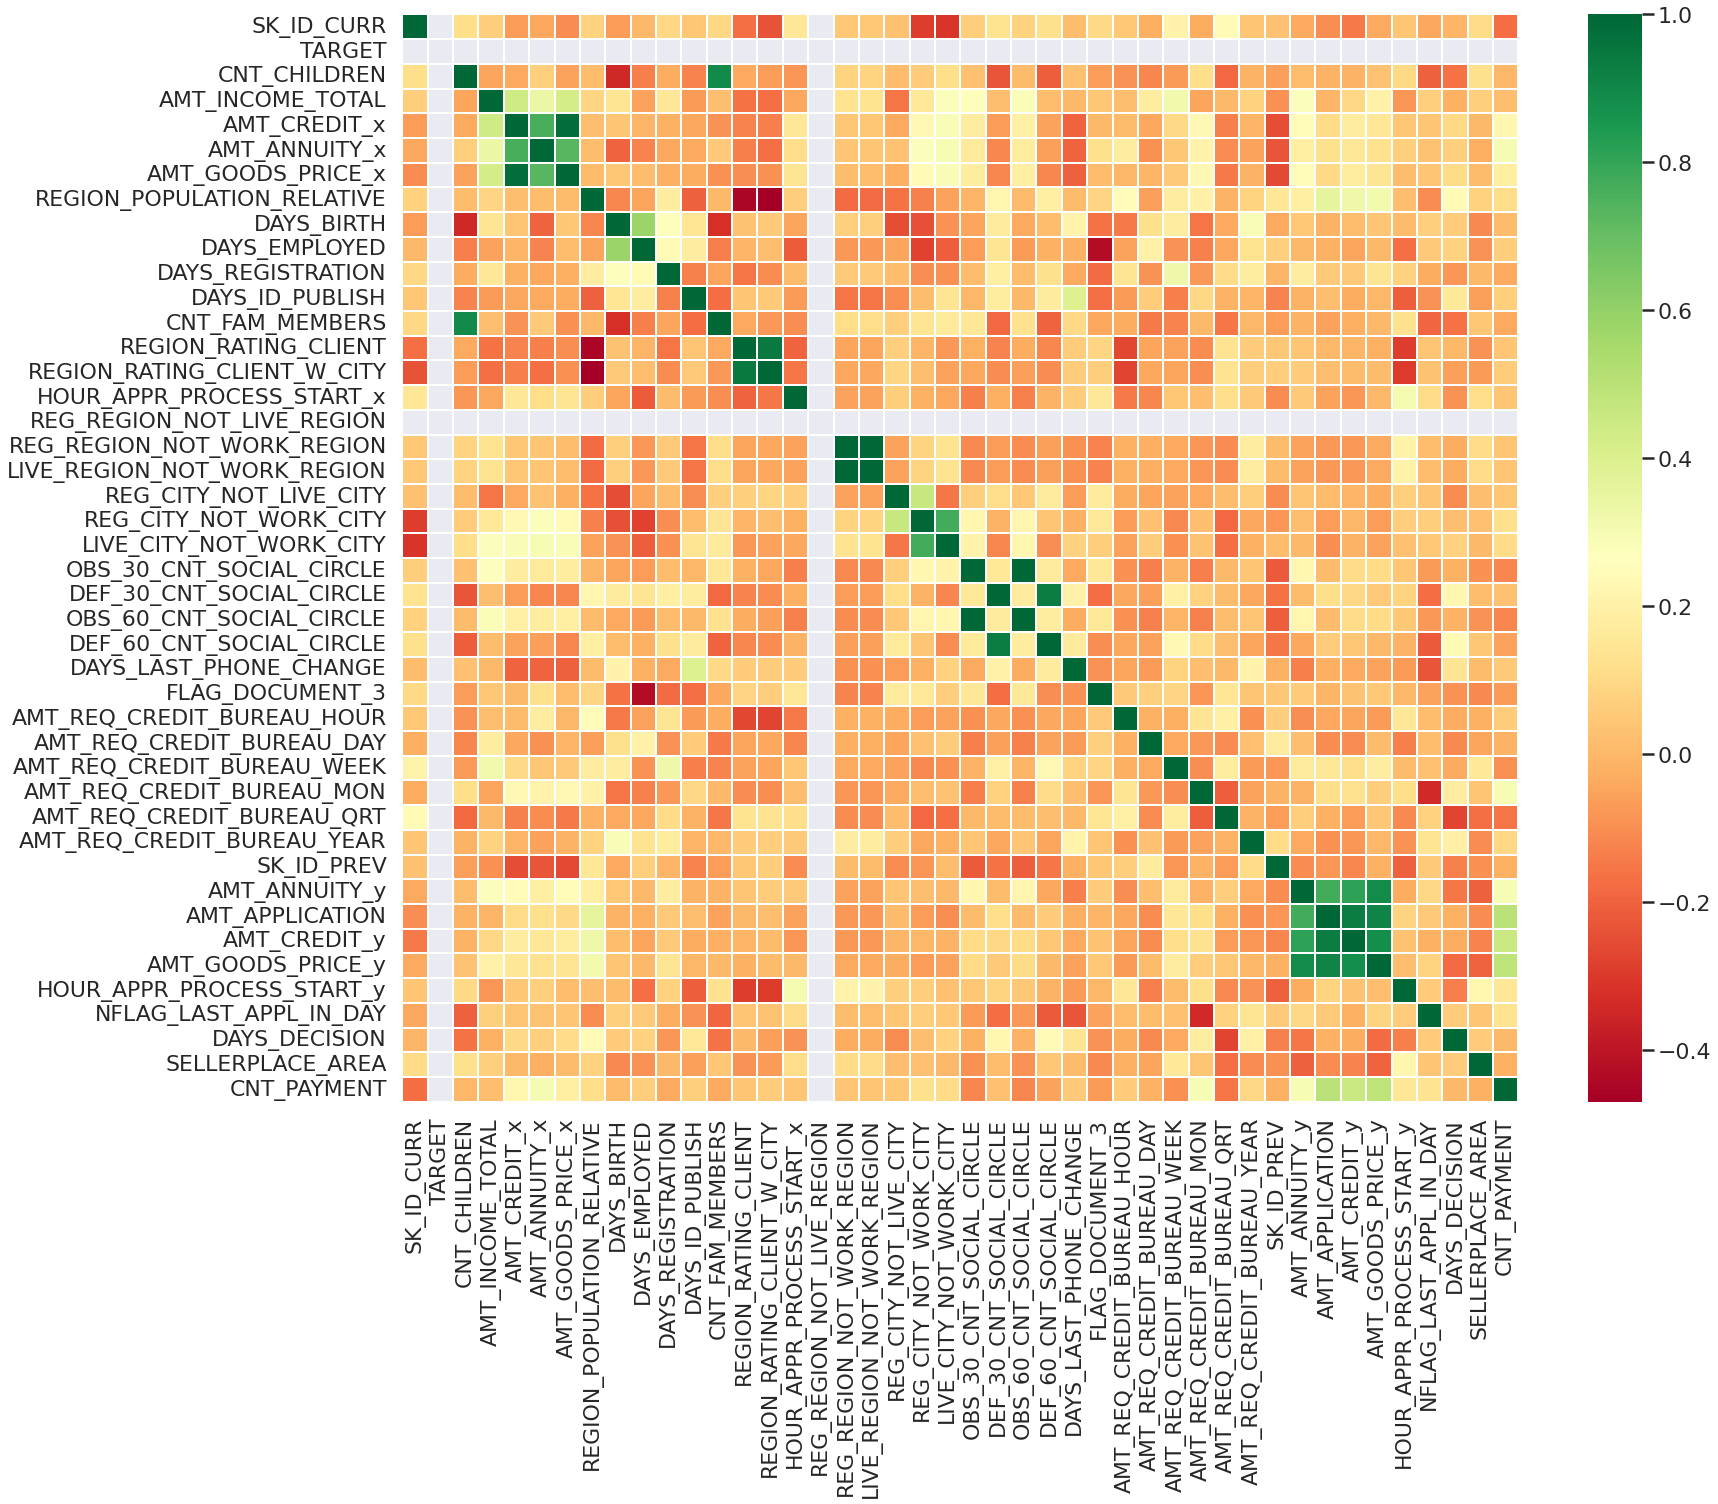

In [391]:
plt.figure(figsize=(25,20))
sns.heatmap(merged1.corr(), cmap="RdYlGn",annot=False,linewidth =1)
plt.show()

In [392]:
correlation_1_target = merged1.corr()
correlation_1_target = correlation_1_target.where(np.triu(np.ones(correlation_1_target.shape), k=1).astype(np.bool))
correlation_1_target = correlation_1_target.unstack().reset_index().dropna(subset = [0])
correlation_1_target.columns = ['VAR1', 'VAR2', 'Correlation_Value']
correlation_1_target['Corr_abs'] = abs(correlation_1_target['Correlation_Value'])
correlation_1_target.sort_values(by = "Corr_abs", ascending =False, inplace = True)
correlation_1_target.head(10)

,VAR1,VAR2,Correlation_Value,Corr_abs
809,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,1.000000,1.000000
1078,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.995777,0.995777
268,AMT_GOODS_PRICE_x,AMT_CREDIT_x,0.980713,0.980713
629,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.945020,0.945020
1123,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.931969,0.931969
1664,AMT_CREDIT_y,AMT_APPLICATION,0.931967,0.931967
1708,AMT_GOODS_PRICE_y,AMT_APPLICATION,0.913657,0.913657
530,CNT_FAM_MEMBERS,CNT_CHILDREN,0.896499,0.896499
1707,AMT_GOODS_PRICE_y,AMT_ANNUITY_y,0.886333,0.886333
1709,AMT_GOODS_PRICE_y,AMT_CREDIT_y,0.882726,0.882726


## Bi-Variate Analysis

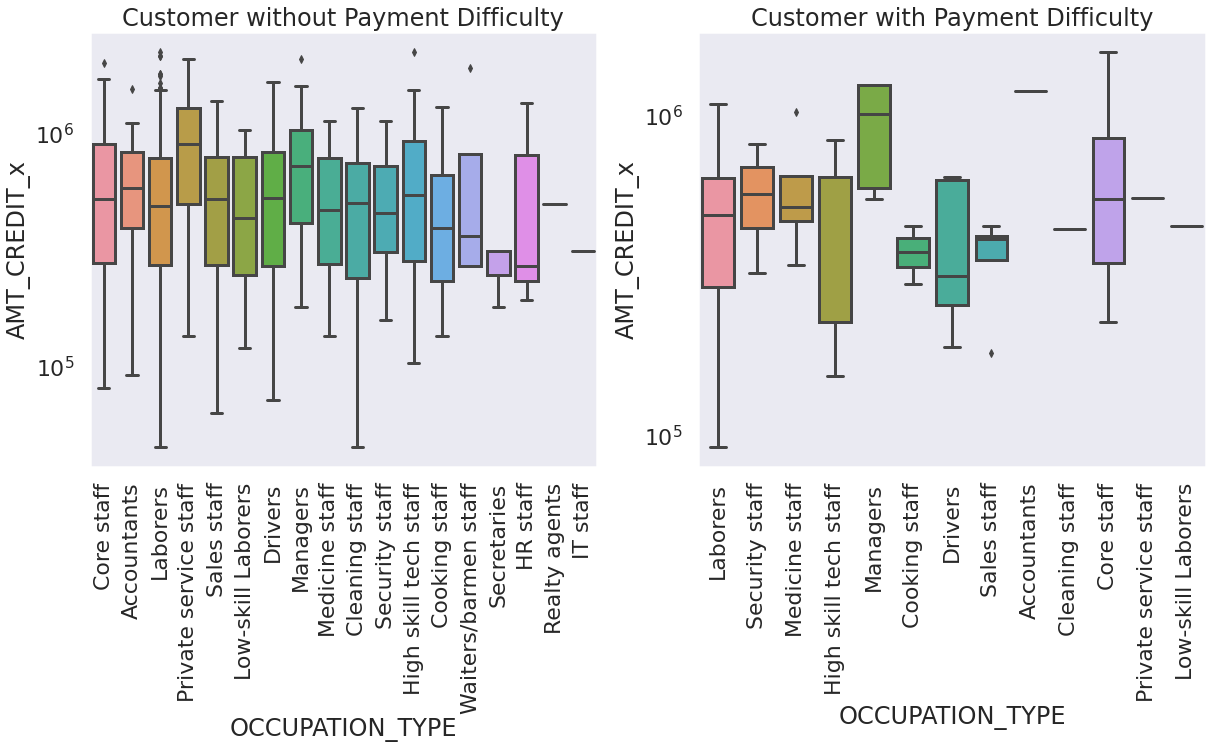

In [393]:
plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
sns.boxplot(data=merged0,y='AMT_CREDIT_x',x='OCCUPATION_TYPE')
plt.title('Customer without Payment Difficulty')
plt.xticks(rotation=90)
plt.yscale('log')

plt.subplot(1,2,2)
sns.boxplot(data=merged1,y='AMT_CREDIT_x',x='OCCUPATION_TYPE')
plt.title('Customer with Payment Difficulty')
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

* inference 1 = Security Staff and Cooking staff plots have similar median values.
* inference 2 = Managers, Accountants,IT staff,Reality agent are top client categories which took high credit amounts and facing difficulty repaying them back.

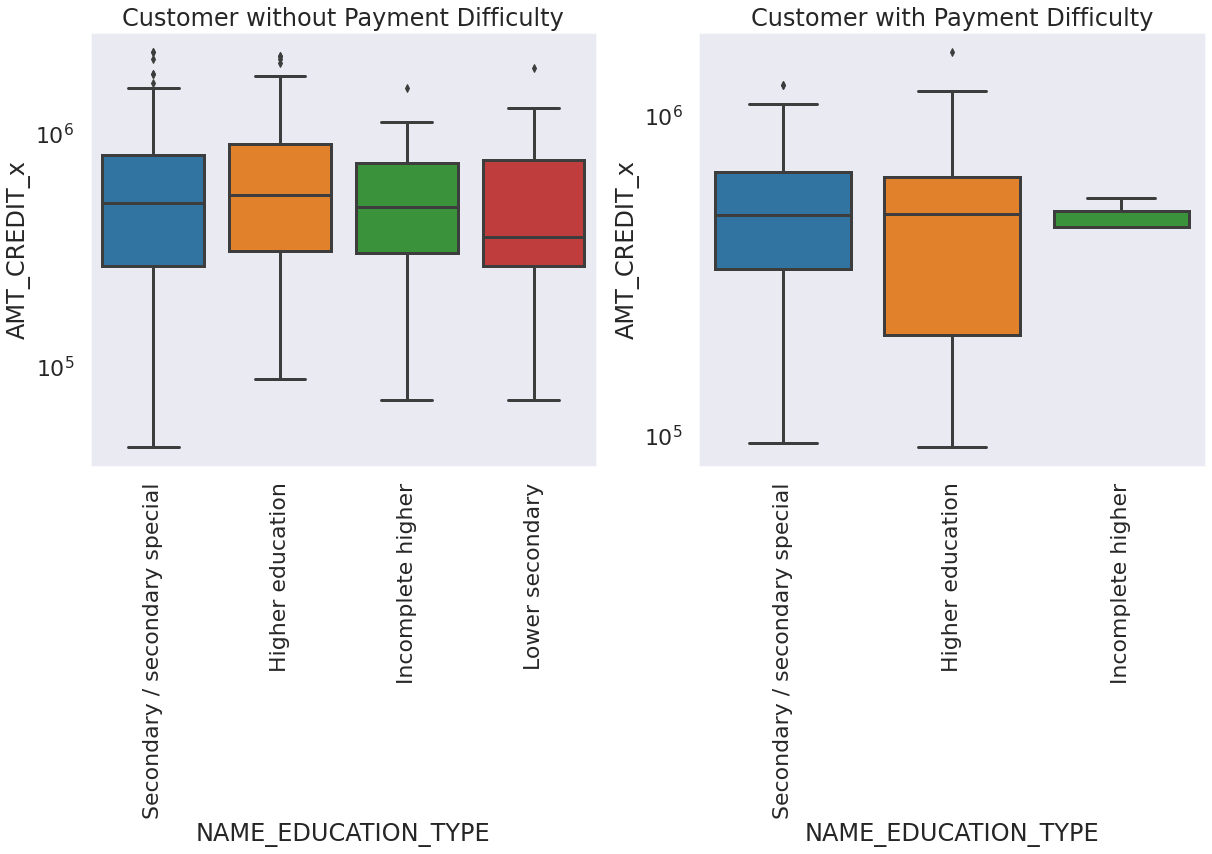

In [394]:
plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
ax = sns.boxplot(data=merged0,y='AMT_CREDIT_x',x='NAME_EDUCATION_TYPE')
plt.title('Customer without Payment Difficulty')
plt.xticks(rotation=90)
plt.yscale('log')
plt.subplot(1,2,2)
ax = sns.boxplot(data=merged1,y='AMT_CREDIT_x',x='NAME_EDUCATION_TYPE')
plt.title('Customer with Payment Difficulty')
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

* inference 1 = Client having academic degree takes more credit amount loans and then faces difficulty repaying them back.
* inference 2 = Client having lower secondary education takes less amount of loan and faces less difficulty in repaying them back.

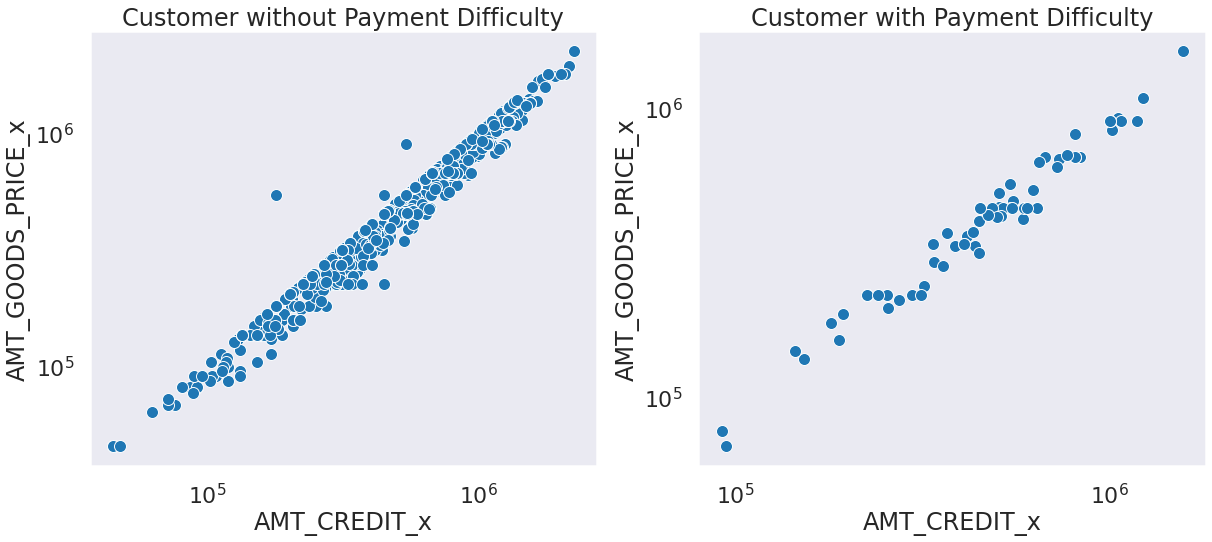

In [395]:
plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
ax = sns.scatterplot(data=merged0,x='AMT_CREDIT_x',y='AMT_GOODS_PRICE_x')
plt.title('Customer without Payment Difficulty')
plt.yscale('log')
plt.xscale('log')

plt.subplot(1,2,2)
ax = sns.scatterplot(data=merged1,x='AMT_CREDIT_x',y='AMT_GOODS_PRICE_x')
plt.title('Customer with Payment Difficulty')
plt.yscale('log')
plt.xscale('log')
plt.show()

* inference 1 = The above data depicts that as the goods price increases, the credited amount also increases. The same data holds good for Customer without Payment Difficulty and Customers with payment difficulty